In [2]:
import helpers, api_request
import pandas as pd

In [3]:
api_request.HMS.login

<function api_request.HMS.login(self)>

In [4]:
api_request.HMS.login

<function api_request.HMS.login(self)>

In [3]:
#replacing COMIDS from new aoi
df_new_catch = pd.read_excel('NHDFlowlineV2_Merrimack_AttributeTable_Excel_CK_BC_KV.xlsx')
df_new_catch.head()

,FID,COMID,FDATE,RESOLUTION,GNIS_ID,GNIS_NAME,LENGTHKM,REACHCODE,FLOWDIR,WBAREACOMI,FTYPE,FCODE,SHAPE_LENG,ENABLED,GNIS_NBR
0,0,6741978,2008-07-21,Medium,619363,Merrimack River,1.123,1070006001801,With Digitized,120049678,ArtificialPath,55800,0.012973,True,0
1,1,6746018,2008-07-21,Medium,619363,Merrimack River,0.198,1070006000409,With Digitized,120049678,ArtificialPath,55800,0.001960,True,0
2,2,6741876,2008-07-21,Medium,619363,Merrimack River,1.962,1070006001810,With Digitized,120049678,ArtificialPath,55800,0.018477,True,0
3,3,6742162,2008-07-21,Medium,619363,Merrimack River,1.034,1070006000002,With Digitized,120049678,ArtificialPath,55800,0.011660,True,0
4,4,6741964,2008-07-21,Medium,619363,Merrimack River,1.397,1070006001803,With Digitized,120049678,ArtificialPath,55800,0.012969,True,0


In [4]:
new_list = df_new_catch['COMID'].tolist()[0:]
type(new_list)

list

In [5]:
#Back Creek COMID Selection Revising from the use of an excel file or csv as above to extract COMID list. 
#Now provides new listing formation 
new_list = [8625279,8625313,8625375,8625523,8625547,8625615,8625685,8625697,8625717,8625727,8625731,8625735,8625739,8625747,8625775,8627469,8628577,8628579,8628581,8628587,8628591,8628603,8628611,8628623,8628627,8628631,8628641,8628643,8629331]

In [6]:
new_list[0:5] #prints out first five COMIDs in list 

[8625279, 8625313, 8625375, 8625523, 8625547]

In [7]:
 len(new_list) #Gets length of the comids in list

29

In [8]:
length = len(new_list)
#Identify how long the COMID list is
print(length)

29


In [9]:
#COMID List of Choice is set here (new from my watershed workflow)
comid_list =[]
comid_list.append(new_list)
print(comid_list)
length = len(comid_list[0])
#Identify how long the COMID list is
print(length) #double checking after resetting to the comid list 

[[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]]
29


In [10]:
#https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=9731484 tester for single
#catch_char_url = ('https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=' + str(comid_list[0][0]))
catch_char_url = ('https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=' + str(comid_list[0][0]))
print(catch_char_url)
import requests
#catch_char_url = ('https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=' + str(comid[i]))
response1 = requests.get(catch_char_url)
print(response1.status_code)
print(response1.json())
catch_char = response1.json()
#catch_char_dic = json.loads(catch_char.json())
print(type(catch_char))
#print(catch_char['metadata']['BANKFULL_DEPTH'],catch_char['metadata']['BANKFULL_XSEC_AREA'], catch_char['metadata'])

https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625279
200
{'metadata': {'FROMCOMID': '8625279', 'FROMHYDSEQ': '250021125', 'FROMLVLPAT': '250020754', 'TOCOMID': '8627469', 'TOHYDSEQ': '250020754', 'TOLVLPAT': '250020754', 'NODENUMBER': '250007866', 'DELTALEVEL': '0', 'DIRECTION': '709', 'GAPDISTKM': '0', 'HasGeo': 'Y', 'TotDASqKM': '151.992', 'DivDASqKM': '151.992', 'Region': '03N', 'ComID': '8625279', 'Fdate': '7/3/2012', 'StreamLeve': '2', 'StreamOrde': '3', 'StreamCalc': '3', 'FromNode': '250007202', 'ToNode': '250007866', 'Hydroseq': '250021125', 'LevelPathI': '250020754', 'Pathlength': '556.341', 'TerminalPa': '250002964', 'Divergence': '0', 'StartFlag': '0', 'TerminalFl': '0', 'DnLevel': '2', 'ThinnerCod': '0', 'UpLevelPat': '250020754', 'UpHydroseq': '250021525', 'DnLevelPat': '250020754', 'DnMinorHyd': '0', 'DnDrainCou': '1', 'DnHydroseq': '250020754', 'FromMeas': '1.91088', 'ToMeas': '100', 'ReachCode': '03010101000410', 'LengthKM': '2.41', 'Fcode': '46006', '

In [11]:
catch_char['metadata'].keys() #list of all the parameters associated with the json request from HMS 

dict_keys(['FROMCOMID', 'FROMHYDSEQ', 'FROMLVLPAT', 'TOCOMID', 'TOHYDSEQ', 'TOLVLPAT', 'NODENUMBER', 'DELTALEVEL', 'DIRECTION', 'GAPDISTKM', 'HasGeo', 'TotDASqKM', 'DivDASqKM', 'Region', 'ComID', 'Fdate', 'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode', 'Hydroseq', 'LevelPathI', 'Pathlength', 'TerminalPa', 'Divergence', 'StartFlag', 'TerminalFl', 'DnLevel', 'ThinnerCod', 'UpLevelPat', 'UpHydroseq', 'DnLevelPat', 'DnMinorHyd', 'DnDrainCou', 'DnHydroseq', 'FromMeas', 'ToMeas', 'ReachCode', 'LengthKM', 'Fcode', 'RtnDiv', 'OutDiv', 'DivEffect', 'VPUIn', 'VPUOut', 'AreaSqKM', 'Tidal', 'TOTMA', 'WBAreaType', 'CentroidLatitude', 'CentroidLongitude', 'WBAREACOMI', 'MAXELEVRAW', 'MINELEVRAW', 'MAXELEVSMO', 'MINELEVSMO', 'SLOPE', 'ELEVFIXED', 'HWTYPE', 'STATUSFLAG', 'SLOPELENKM', 'COMID', 'REACHCODE', 'HUC12', 'TOHUC', 'Length', 'BANKFULL_WIDTH', 'BANKFULL_DEPTH', 'BANKFULL_XSEC_AREA'])

In [12]:
type(catch_char['metadata'])

dict

In [13]:
new_data = catch_char['metadata']
type(new_data)

dict

In [14]:
new_data

{'FROMCOMID': '8625279',
 'FROMHYDSEQ': '250021125',
 'FROMLVLPAT': '250020754',
 'TOCOMID': '8627469',
 'TOHYDSEQ': '250020754',
 'TOLVLPAT': '250020754',
 'NODENUMBER': '250007866',
 'DELTALEVEL': '0',
 'DIRECTION': '709',
 'GAPDISTKM': '0',
 'HasGeo': 'Y',
 'TotDASqKM': '151.992',
 'DivDASqKM': '151.992',
 'Region': '03N',
 'ComID': '8625279',
 'Fdate': '7/3/2012',
 'StreamLeve': '2',
 'StreamOrde': '3',
 'StreamCalc': '3',
 'FromNode': '250007202',
 'ToNode': '250007866',
 'Hydroseq': '250021125',
 'LevelPathI': '250020754',
 'Pathlength': '556.341',
 'TerminalPa': '250002964',
 'Divergence': '0',
 'StartFlag': '0',
 'TerminalFl': '0',
 'DnLevel': '2',
 'ThinnerCod': '0',
 'UpLevelPat': '250020754',
 'UpHydroseq': '250021525',
 'DnLevelPat': '250020754',
 'DnMinorHyd': '0',
 'DnDrainCou': '1',
 'DnHydroseq': '250020754',
 'FromMeas': '1.91088',
 'ToMeas': '100',
 'ReachCode': '03010101000410',
 'LengthKM': '2.41',
 'Fcode': '46006',
 'RtnDiv': '0',
 'OutDiv': '0',
 'DivEffect': '0'

In [15]:
new_data.items()

dict_items([('FROMCOMID', '8625279'), ('FROMHYDSEQ', '250021125'), ('FROMLVLPAT', '250020754'), ('TOCOMID', '8627469'), ('TOHYDSEQ', '250020754'), ('TOLVLPAT', '250020754'), ('NODENUMBER', '250007866'), ('DELTALEVEL', '0'), ('DIRECTION', '709'), ('GAPDISTKM', '0'), ('HasGeo', 'Y'), ('TotDASqKM', '151.992'), ('DivDASqKM', '151.992'), ('Region', '03N'), ('ComID', '8625279'), ('Fdate', '7/3/2012'), ('StreamLeve', '2'), ('StreamOrde', '3'), ('StreamCalc', '3'), ('FromNode', '250007202'), ('ToNode', '250007866'), ('Hydroseq', '250021125'), ('LevelPathI', '250020754'), ('Pathlength', '556.341'), ('TerminalPa', '250002964'), ('Divergence', '0'), ('StartFlag', '0'), ('TerminalFl', '0'), ('DnLevel', '2'), ('ThinnerCod', '0'), ('UpLevelPat', '250020754'), ('UpHydroseq', '250021525'), ('DnLevelPat', '250020754'), ('DnMinorHyd', '0'), ('DnDrainCou', '1'), ('DnHydroseq', '250020754'), ('FromMeas', '1.91088'), ('ToMeas', '100'), ('ReachCode', '03010101000410'), ('LengthKM', '2.41'), ('Fcode', '46006

In [16]:
df_new_data = pd.DataFrame.from_dict(new_data.items())
df_new_data.head()

,0,1
0,FROMCOMID,8625279
1,FROMHYDSEQ,250021125
2,FROMLVLPAT,250020754
3,TOCOMID,8627469
4,TOHYDSEQ,250020754


In [17]:
df_nd_2 = df_new_data.transpose()

In [18]:
df_nd_2[0:-1][:].values

array([['FROMCOMID', 'FROMHYDSEQ', 'FROMLVLPAT', 'TOCOMID', 'TOHYDSEQ',
        'TOLVLPAT', 'NODENUMBER', 'DELTALEVEL', 'DIRECTION', 'GAPDISTKM',
        'HasGeo', 'TotDASqKM', 'DivDASqKM', 'Region', 'ComID', 'Fdate',
        'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode',
        'Hydroseq', 'LevelPathI', 'Pathlength', 'TerminalPa',
        'Divergence', 'StartFlag', 'TerminalFl', 'DnLevel', 'ThinnerCod',
        'UpLevelPat', 'UpHydroseq', 'DnLevelPat', 'DnMinorHyd',
        'DnDrainCou', 'DnHydroseq', 'FromMeas', 'ToMeas', 'ReachCode',
        'LengthKM', 'Fcode', 'RtnDiv', 'OutDiv', 'DivEffect', 'VPUIn',
        'VPUOut', 'AreaSqKM', 'Tidal', 'TOTMA', 'WBAreaType',
        'CentroidLatitude', 'CentroidLongitude', 'WBAREACOMI',
        'MAXELEVRAW', 'MINELEVRAW', 'MAXELEVSMO', 'MINELEVSMO', 'SLOPE',
        'ELEVFIXED', 'HWTYPE', 'STATUSFLAG', 'SLOPELENKM', 'COMID',
        'REACHCODE', 'HUC12', 'TOHUC', 'Length', 'BANKFULL_WIDTH',
        'BANKFULL_DEPTH', 'BANKFULL

In [19]:
df_nd_2.keys = df_nd_2[0:-1][:].values

In [20]:
df_nd_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
 1   1       2 non-null      object
 2   2       2 non-null      object
 3   3       2 non-null      object
 4   4       2 non-null      object
 5   5       2 non-null      object
 6   6       2 non-null      object
 7   7       2 non-null      object
 8   8       2 non-null      object
 9   9       2 non-null      object
 10  10      2 non-null      object
 11  11      2 non-null      object
 12  12      2 non-null      object
 13  13      2 non-null      object
 14  14      2 non-null      object
 15  15      2 non-null      object
 16  16      2 non-null      object
 17  17      2 non-null      object
 18  18      2 non-null      object
 19  19      2 non-null      object
 20  20      2 non-null      object
 21  21      2 non-null      object
 22  22      2 non-null      object

In [21]:
df_new_data.head()

,0,1
0,FROMCOMID,8625279
1,FROMHYDSEQ,250021125
2,FROMLVLPAT,250020754
3,TOCOMID,8627469
4,TOHYDSEQ,250020754


In [22]:
catch_char['metadata'].keys()

dict_keys(['FROMCOMID', 'FROMHYDSEQ', 'FROMLVLPAT', 'TOCOMID', 'TOHYDSEQ', 'TOLVLPAT', 'NODENUMBER', 'DELTALEVEL', 'DIRECTION', 'GAPDISTKM', 'HasGeo', 'TotDASqKM', 'DivDASqKM', 'Region', 'ComID', 'Fdate', 'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode', 'Hydroseq', 'LevelPathI', 'Pathlength', 'TerminalPa', 'Divergence', 'StartFlag', 'TerminalFl', 'DnLevel', 'ThinnerCod', 'UpLevelPat', 'UpHydroseq', 'DnLevelPat', 'DnMinorHyd', 'DnDrainCou', 'DnHydroseq', 'FromMeas', 'ToMeas', 'ReachCode', 'LengthKM', 'Fcode', 'RtnDiv', 'OutDiv', 'DivEffect', 'VPUIn', 'VPUOut', 'AreaSqKM', 'Tidal', 'TOTMA', 'WBAreaType', 'CentroidLatitude', 'CentroidLongitude', 'WBAREACOMI', 'MAXELEVRAW', 'MINELEVRAW', 'MAXELEVSMO', 'MINELEVSMO', 'SLOPE', 'ELEVFIXED', 'HWTYPE', 'STATUSFLAG', 'SLOPELENKM', 'COMID', 'REACHCODE', 'HUC12', 'TOHUC', 'Length', 'BANKFULL_WIDTH', 'BANKFULL_DEPTH', 'BANKFULL_XSEC_AREA'])

In [23]:
for key in catch_char['metadata']:
    print (key)

FROMCOMID
FROMHYDSEQ
FROMLVLPAT
TOCOMID
TOHYDSEQ
TOLVLPAT
NODENUMBER
DELTALEVEL
DIRECTION
GAPDISTKM
HasGeo
TotDASqKM
DivDASqKM
Region
ComID
Fdate
StreamLeve
StreamOrde
StreamCalc
FromNode
ToNode
Hydroseq
LevelPathI
Pathlength
TerminalPa
Divergence
StartFlag
TerminalFl
DnLevel
ThinnerCod
UpLevelPat
UpHydroseq
DnLevelPat
DnMinorHyd
DnDrainCou
DnHydroseq
FromMeas
ToMeas
ReachCode
LengthKM
Fcode
RtnDiv
OutDiv
DivEffect
VPUIn
VPUOut
AreaSqKM
Tidal
TOTMA
WBAreaType
CentroidLatitude
CentroidLongitude
WBAREACOMI
MAXELEVRAW
MINELEVRAW
MAXELEVSMO
MINELEVSMO
SLOPE
ELEVFIXED
HWTYPE
STATUSFLAG
SLOPELENKM
COMID
REACHCODE
HUC12
TOHUC
Length
BANKFULL_WIDTH
BANKFULL_DEPTH
BANKFULL_XSEC_AREA


In [25]:
catch_char['metadata'].keys()

dict_keys(['FROMCOMID', 'FROMHYDSEQ', 'FROMLVLPAT', 'TOCOMID', 'TOHYDSEQ', 'TOLVLPAT', 'NODENUMBER', 'DELTALEVEL', 'DIRECTION', 'GAPDISTKM', 'HasGeo', 'TotDASqKM', 'DivDASqKM', 'Region', 'ComID', 'Fdate', 'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode', 'Hydroseq', 'LevelPathI', 'Pathlength', 'TerminalPa', 'Divergence', 'StartFlag', 'TerminalFl', 'DnLevel', 'ThinnerCod', 'UpLevelPat', 'UpHydroseq', 'DnLevelPat', 'DnMinorHyd', 'DnDrainCou', 'DnHydroseq', 'FromMeas', 'ToMeas', 'ReachCode', 'LengthKM', 'Fcode', 'RtnDiv', 'OutDiv', 'DivEffect', 'VPUIn', 'VPUOut', 'AreaSqKM', 'Tidal', 'TOTMA', 'WBAreaType', 'CentroidLatitude', 'CentroidLongitude', 'WBAREACOMI', 'MAXELEVRAW', 'MINELEVRAW', 'MAXELEVSMO', 'MINELEVSMO', 'SLOPE', 'ELEVFIXED', 'HWTYPE', 'STATUSFLAG', 'SLOPELENKM', 'COMID', 'REACHCODE', 'HUC12', 'TOHUC', 'Length', 'BANKFULL_WIDTH', 'BANKFULL_DEPTH', 'BANKFULL_XSEC_AREA'])

In [26]:
df_nd_2[0:-1][:].values

array([['FROMCOMID', 'FROMHYDSEQ', 'FROMLVLPAT', 'TOCOMID', 'TOHYDSEQ',
        'TOLVLPAT', 'NODENUMBER', 'DELTALEVEL', 'DIRECTION', 'GAPDISTKM',
        'HasGeo', 'TotDASqKM', 'DivDASqKM', 'Region', 'ComID', 'Fdate',
        'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode',
        'Hydroseq', 'LevelPathI', 'Pathlength', 'TerminalPa',
        'Divergence', 'StartFlag', 'TerminalFl', 'DnLevel', 'ThinnerCod',
        'UpLevelPat', 'UpHydroseq', 'DnLevelPat', 'DnMinorHyd',
        'DnDrainCou', 'DnHydroseq', 'FromMeas', 'ToMeas', 'ReachCode',
        'LengthKM', 'Fcode', 'RtnDiv', 'OutDiv', 'DivEffect', 'VPUIn',
        'VPUOut', 'AreaSqKM', 'Tidal', 'TOTMA', 'WBAreaType',
        'CentroidLatitude', 'CentroidLongitude', 'WBAREACOMI',
        'MAXELEVRAW', 'MINELEVRAW', 'MAXELEVSMO', 'MINELEVSMO', 'SLOPE',
        'ELEVFIXED', 'HWTYPE', 'STATUSFLAG', 'SLOPELENKM', 'COMID',
        'REACHCODE', 'HUC12', 'TOHUC', 'Length', 'BANKFULL_WIDTH',
        'BANKFULL_DEPTH', 'BANKFULL

In [27]:
key_list = [df_nd_2[0:-1][:].values]

In [28]:
key_list[:]

[array([['FROMCOMID', 'FROMHYDSEQ', 'FROMLVLPAT', 'TOCOMID', 'TOHYDSEQ',
         'TOLVLPAT', 'NODENUMBER', 'DELTALEVEL', 'DIRECTION', 'GAPDISTKM',
         'HasGeo', 'TotDASqKM', 'DivDASqKM', 'Region', 'ComID', 'Fdate',
         'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode', 'ToNode',
         'Hydroseq', 'LevelPathI', 'Pathlength', 'TerminalPa',
         'Divergence', 'StartFlag', 'TerminalFl', 'DnLevel', 'ThinnerCod',
         'UpLevelPat', 'UpHydroseq', 'DnLevelPat', 'DnMinorHyd',
         'DnDrainCou', 'DnHydroseq', 'FromMeas', 'ToMeas', 'ReachCode',
         'LengthKM', 'Fcode', 'RtnDiv', 'OutDiv', 'DivEffect', 'VPUIn',
         'VPUOut', 'AreaSqKM', 'Tidal', 'TOTMA', 'WBAreaType',
         'CentroidLatitude', 'CentroidLongitude', 'WBAREACOMI',
         'MAXELEVRAW', 'MINELEVRAW', 'MAXELEVSMO', 'MINELEVSMO', 'SLOPE',
         'ELEVFIXED', 'HWTYPE', 'STATUSFLAG', 'SLOPELENKM', 'COMID',
         'REACHCODE', 'HUC12', 'TOHUC', 'Length', 'BANKFULL_WIDTH',
         'BANKFULL_DE

In [29]:
type(key_list)

list

In [30]:
df_test = pd.DataFrame(catch_char['metadata'].items()).transpose()

In [31]:
df_test[0:-1][:]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,FROMCOMID,FROMHYDSEQ,FROMLVLPAT,TOCOMID,TOHYDSEQ,TOLVLPAT,NODENUMBER,DELTALEVEL,DIRECTION,GAPDISTKM,...,STATUSFLAG,SLOPELENKM,COMID,REACHCODE,HUC12,TOHUC,Length,BANKFULL_WIDTH,BANKFULL_DEPTH,BANKFULL_XSEC_AREA


In [32]:
df_test.columns 

RangeIndex(start=0, stop=70, step=1)

In [33]:
catch_char['metadata'].keys

<function dict.keys>

In [34]:
len(catch_char['metadata'].keys())

70

In [35]:
df_test.columns = catch_char['metadata'].keys()
df_test[1:]

,FROMCOMID,FROMHYDSEQ,FROMLVLPAT,TOCOMID,TOHYDSEQ,TOLVLPAT,NODENUMBER,DELTALEVEL,DIRECTION,GAPDISTKM,...,STATUSFLAG,SLOPELENKM,COMID,REACHCODE,HUC12,TOHUC,Length,BANKFULL_WIDTH,BANKFULL_DEPTH,BANKFULL_XSEC_AREA
1,8625279,250021125,250020754,8627469,250020754,250020754,250007866,0,709,0,...,A,2.41,8625279,03010101000410,030101010405,030101010701,0.0,25.10,1.10,28.17


In [36]:
df_test_2 = df_test[1:]
df_test_2

,FROMCOMID,FROMHYDSEQ,FROMLVLPAT,TOCOMID,TOHYDSEQ,TOLVLPAT,NODENUMBER,DELTALEVEL,DIRECTION,GAPDISTKM,...,STATUSFLAG,SLOPELENKM,COMID,REACHCODE,HUC12,TOHUC,Length,BANKFULL_WIDTH,BANKFULL_DEPTH,BANKFULL_XSEC_AREA
1,8625279,250021125,250020754,8627469,250020754,250020754,250007866,0,709,0,...,A,2.41,8625279,03010101000410,030101010405,030101010701,0.0,25.10,1.10,28.17


In [43]:
#Your focus variables
data_2 = [(catch_char['metadata']['ComID'],catch_char['metadata']['BANKFULL_DEPTH'], catch_char['metadata']['BANKFULL_XSEC_AREA'], catch_char['metadata']['SLOPE'], catch_char['metadata']['BANKFULL_WIDTH'], catch_char['metadata']['LengthKM'])] 
data_2

[('8625279', '1.10', '28.17', '0.00255186', '25.10', '2.41')]

In [14]:
data_3 = [('COMID','StrDepth', 'StrSlope', 'StrXArea', 'StrWidth', 'StrLength'), (catch_char['metadata']['ComID'],catch_char['metadata']['BANKFULL_DEPTH'], catch_char['metadata']['BANKFULL_XSEC_AREA'], catch_char['metadata']['SLOPE'], catch_char['metadata']['BANKFULL_WIDTH'], catch_char['metadata']['LengthKM'])] 
data_3

[('COMID', 'StrDepth', 'StrSlope', 'StrXArea', 'StrWidth', 'StrLength'),
 ('6741978', '3.18', '380.72', '0.00001', '116.47', '1.123')]

In [37]:
df_all = pd.DataFrame()
for comid in comid_list:
    for i in range(length):
        print (comid[i])
        catch_char_url1 = ('https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=' + str(comid[i]))
        print(catch_char_url1)
        response2 = requests.get(catch_char_url1)
        catch_char1 = response2.json()
        #Specifying particular parameters
        #print (catch_char1['metadata']['ComID'],catch_char1['metadata']['BANKFULL_DEPTH'], catch_char1['metadata']['BANKFULL_XSEC_AREA'], catch_char1['metadata']['SLOPE'], catch_char1['metadata']['BANKFULL_WIDTH'], catch_char1['metadata']['LengthKM'])
        #data_f = [(catch_char1['metadata']['ComID'],catch_char1['metadata']['BANKFULL_DEPTH'], catch_char1['metadata']['BANKFULL_XSEC_AREA'], catch_char1['metadata']['SLOPE'], catch_char1['metadata']['BANKFULL_WIDTH'], catch_char1['metadata']['LengthKM'])]
        #Taking all data 
        df_test = pd.DataFrame(catch_char1['metadata'].items()).transpose()
        df_test.columns = catch_char1['metadata'].keys()
        #df_test[1:]
        df_test_2 = df_test[1:]
        df_all =  pd.concat([df_test_2, df_all])

8625279
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625279
8625313
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625313
8625375
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625375
8625523
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625523
8625547
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625547
8625615
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625615
8625685
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625685
8625697
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625697
8625717
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625717
8625727
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625727
8625731
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625731
8625735
https://ceamdev.ceeopdev.net/hms/rest/api/info/catchment?comid=8625735
8625739
https://ceamdev.ceeopdev.net/hms/rest/api/in

In [38]:
df_all.head()

,FROMCOMID,FROMHYDSEQ,FROMLVLPAT,TOCOMID,TOHYDSEQ,TOLVLPAT,NODENUMBER,DELTALEVEL,DIRECTION,GAPDISTKM,...,STATUSFLAG,SLOPELENKM,COMID,REACHCODE,HUC12,TOHUC,Length,BANKFULL_WIDTH,BANKFULL_DEPTH,BANKFULL_XSEC_AREA
1,8629331,250033174,250020754,8628623,250031794,250020754,250008257,0,709,0,...,A,3.773,8629331,03010101000425,030101010405,030101010701,0.0,17.15,0.84,14.77
1,8628643,250093396,250020754,8628641,250071641,250020754,250008263,0,709,0,...,A,1.203,8628643,03010101000435,030101010405,030101010701,0.0,4.87,0.35,1.74
1,8628641,250071641,250020754,8628627,250060349,250020754,250008259,0,709,0,...,A,0.84,8628641,03010101000434,030101010405,030101010701,0.0,5.91,0.40,2.43
1,8628631,250132505,250020754,8628643,250093396,250020754,250008264,0,709,0,...,A,1.175,8628631,03010101000435,030101010405,030101010701,0.0,3.87,0.30,1.18
1,8628627,250060349,250020754,8628611,250053061,250020754,250008254,0,709,0,...,A,0.435,8628627,03010101000433,030101010405,030101010701,0.0,8.39,0.52,4.39


In [177]:
#df_all.to_csv('060223_BackCreek_COMID_HMS_Metadata.csv')

In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 1
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FROMCOMID           29 non-null     object
 1   FROMHYDSEQ          29 non-null     object
 2   FROMLVLPAT          29 non-null     object
 3   TOCOMID             29 non-null     object
 4   TOHYDSEQ            29 non-null     object
 5   TOLVLPAT            29 non-null     object
 6   NODENUMBER          29 non-null     object
 7   DELTALEVEL          29 non-null     object
 8   DIRECTION           29 non-null     object
 9   GAPDISTKM           29 non-null     object
 10  HasGeo              29 non-null     object
 11  TotDASqKM           29 non-null     object
 12  DivDASqKM           29 non-null     object
 13  Region              29 non-null     object
 14  ComID               29 non-null     object
 15  Fdate               29 non-null     object
 16  StreamLeve          29 non-nu

In [40]:
df_all['HUC12'].unique()

array(['030101010405'], dtype=object)

In [182]:
import requests

headers = {
    'accept': '*/*',
    'Content-Type': 'application/json-patch+json',
}

data = '{"runoffSource":"nldas","streamHydrology":"constant","aggregation":false,"source":"streamflow","dateTimeSpan":{"startDate":"2014-07-01T00:00:00","endDate":"2014-07-31T00:00:00","dateTimeFormat":"yyyy-MM-dd HH"},"geometry":{"description":null,"comID":0,"hucID":"030101010405","stationID":null,"point":null,"geometryMetadata":{"precipSource":"nldas"},"timezone":null},"dataValueFormat":"E3","temporalResolution":"default","timeLocalized":true,"units":"default","outputFormat":"json","baseURL":null,"inputTimeSeries":null}'

response = requests.post('https://ceamdev.ceeopdev.net/hms/rest/api/workflow/watershed', headers=headers, data=data)

In [183]:
output1 = response.json()

In [184]:
type(output1)

dict

In [185]:
output1.keys()

dict_keys(['dataset', 'dataSource', 'metadata', 'data', 'table'])

In [195]:
output1['metadata']

{'request_url': 'api/workflow/watershed',
 'start_date': '07/01/2014 01:00:00',
 'end_date': '08/08/2014 00:00:00',
 'timestep': 'daily',
 'errors': '',
 'catchments': '8625279,8627469,8625313,8625375,8625523,8625547,8625615,8625685,8625697,8625717,8625739,8625727,8625747,8625735,8625775,8625731,8628623,8629331,8628579,8628577,8628591,8628587,8628581,8628603,8628611,8628627,8628641,8628631,8628643,8625237,8627287,8625383,8625371,8625387,8625369,8625339,8625551,8625687,8625649,8625651,8625703,8625699,8629339,8625483,8628541,8628553,8628575,8628489,8628503,8628571,8628565,8628561,8628543,8628527,8628613,8628585,8628671,8628653,8628713,8628729,8628661,8628633,8628607,8628691,8628675,8629333,8628655,8625733,8625935,8625969,8625949,8625947,8627597,8625867,8626021,8625851,8625927,8625901,8625957,8625869,8625677,8625815,8625771,8625653',
 'connectivity_table_source': 'PlusFlowlineVAA',
 'NHDPlus_url': 'http://www.horizon-systems.com/nhdplus/NHDPlusV2_data.php',
 'Time_elapsed': '0.76468333333

In [196]:
output1['metadata']['catchments']

'8625279,8627469,8625313,8625375,8625523,8625547,8625615,8625685,8625697,8625717,8625739,8625727,8625747,8625735,8625775,8625731,8628623,8629331,8628579,8628577,8628591,8628587,8628581,8628603,8628611,8628627,8628641,8628631,8628643,8625237,8627287,8625383,8625371,8625387,8625369,8625339,8625551,8625687,8625649,8625651,8625703,8625699,8629339,8625483,8628541,8628553,8628575,8628489,8628503,8628571,8628565,8628561,8628543,8628527,8628613,8628585,8628671,8628653,8628713,8628729,8628661,8628633,8628607,8628691,8628675,8629333,8628655,8625733,8625935,8625969,8625949,8625947,8627597,8625867,8626021,8625851,8625927,8625901,8625957,8625869,8625677,8625815,8625771,8625653'

In [198]:
len(output1['metadata']['catchments']) # must use aqusition by by .loc or by single COMID and year as there are several hundred more sites

671

In [189]:
output1['dataset'] # will not use watershed workflow api. Will apply temp/precip/runoff annually per comid because of volume 

'Precipitation, SurfaceRunoff, SubsurfaceRunoff, StreamHydrology'

In [188]:
output1.items()

dict_items([('dataset', 'Precipitation, SurfaceRunoff, SubsurfaceRunoff, StreamHydrology'), ('dataSource', 'nldas, nldas, nldas, constant'), ('metadata', {'request_url': 'api/workflow/watershed', 'start_date': '07/01/2014 01:00:00', 'end_date': '08/08/2014 00:00:00', 'timestep': 'daily', 'errors': '', 'catchments': '8625279,8627469,8625313,8625375,8625523,8625547,8625615,8625685,8625697,8625717,8625739,8625727,8625747,8625735,8625775,8625731,8628623,8629331,8628579,8628577,8628591,8628587,8628581,8628603,8628611,8628627,8628641,8628631,8628643,8625237,8627287,8625383,8625371,8625387,8625369,8625339,8625551,8625687,8625649,8625651,8625703,8625699,8629339,8625483,8628541,8628553,8628575,8628489,8628503,8628571,8628565,8628561,8628543,8628527,8628613,8628585,8628671,8628653,8628713,8628729,8628661,8628633,8628607,8628691,8628675,8629333,8628655,8625733,8625935,8625969,8625949,8625947,8627597,8625867,8626021,8625851,8625927,8625901,8625957,8625869,8625677,8625815,8625771,8625653', 'connect

In [41]:
import datetime as dt

In [42]:
years = (2018 - 1981) +1
years

38

In [43]:
datetime_series = pd.date_range('1981-01-01', periods=years, freq='Y')
datetime_series #setting true date for acquistion period 

DatetimeIndex(['1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
               '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31',
               '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31',
               '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [44]:
import numpy as np
import requests
import json
np_year = np.linspace(1981, 2018, num=years) #number is (year_last-year_1) + 1
int(np_year[0]) #first year in numpy array for year loop 

1981

In [45]:
int(np_year[-1]) # last year 

2018

In [46]:
type(new_list[0])

int

In [210]:
import pandas as pd
import numpy as np
import os

In [50]:
#str(comid[i])
for comid in comid_list:
    print (comid)

[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]


In [51]:
comid[i]

8629331

In [62]:
headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }
data = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": null,\n      "longitude": null\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
#data_temp_input = json.loads(data_temp_test)
#qedcloud.net/hms
#test_parse2['geometry'].update(hucID = "null", comID = "190641")
response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/temperature', headers=headers, data=data)
#print(comid)
#response = requests.post('https://qed.epa.gov/hms/rest/api/hydrology/temperature', headers=headers, data=data)
output1 = response.json()
temp_all = output1['data']

In [63]:
output1
#temp_all

{'dataset': '',
 'dataSource': '',
 'metadata': {'ERROR': 'Unable to complete request due to invalid request or unknown error.'},
 'data': {}}

In [52]:
#condensed cleaned code for automation success using HMS 
df_focus_all = pd.DataFrame()
#correct accessibility of location list 
for comid in comid_list:
    for year in np_year:
        start_year = int(year)
        start_date = str('1/1/') +str(start_year)
        end_date = str('12/31/') +str(start_year)
        #print(start_date, end_date)
        year_parse = pd.date_range(start=start_date, end=end_date, freq='D')
        #year_parse chunking to remove possible bottlenecks 
        print(year_parse.min(), year_parse.max()) #now in date time format for call in on api 
        #Temperature Conversion 
        data_temp_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": null,\n      "longitude": null\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_temp_input = json.loads(data_temp_test)
        data_temp_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent date change in scope
        data_temp_input['geometry']['comID'] = str(comid) #correct for comid update
        #updated above comid acquistion rather than latitude and long by cell
        #data_temp_input['geometry']['point'].update({'latitude': str(df_2['lat'].iloc[(int(cell))]), 'longitude': str(df_2['long'].iloc[(int(cell))])}) #correct for point update
        data_temp_new = json.dumps(data_temp_input)
        #print(data_temp_new) 
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }
        data = data_temp_new
        #qedcloud.net/hms
        response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/temperature', headers=headers, data=data)
        print(comid)
        #response = requests.post('https://qed.epa.gov/hms/rest/api/hydrology/temperature', headers=headers, data=data)
        output1 = response.json()
        temp_all = output1['data']
        #for daymet data without Avg Temp daily column needs to be calculated in third column for code to work 
        #df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp'] )
        #df_temp_all['Avg Temp'] = np.mean(df_temp_all.values, axis=1)
        #for nldas
        df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp', 'Avg Temp'] )
        df_temp_all['C'] = df_temp_all['Avg Temp'] - 273.15
        df_temp_all['date']= pd.to_datetime(df_temp_all.index[:])
        #df_temp_all['year'] = df_temp_all.date.dt.year
        #df_temp_all['jday'] = df_temp_all.date.dt.day_of_year 
        # Completes Temperature (working correctly) may need to concatonate df rather than different xlsx
        df_focus = df_temp_all[['C']]
        df_focus.index = df_temp_all.index
        df_focus['COMID'] = comid #Will need to repartition by cell id later using df.loc
        df_focus.info()
        df_focus_all = pd.concat([df_focus, df_focus_all])
        df_focus_all.info() #for testing items in dataframe through iteration

1981-01-01 00:00:00 1981-12-31 00:00:00
[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
1982-01-01 00:00:00 1982-12-31 00:00:00
[8625279, 8625313, 8625375, 8625523, 8625547, 86

<ipython-input-52-e1e6ce5fb2f0>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['COMID'] = comid #Will need to repartition by cell id later using df.loc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   58 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
1983-01-01 00:00:00 1983-12-31 00:00:00
[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 c

[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   377 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.8 KB
1994-01-01 00:00:00 1994-12-31 00:00:00
[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8

[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   667 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 15.6 KB
2004-01-01 00:00:00 2004-12-31 00:00:00
[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 

[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 8625731, 8625735, 8625739, 8625747, 8625775, 8627469, 8628577, 8628579, 8628581, 8628587, 8628591, 8628603, 8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   29 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   957 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 22.4 KB
2014-01-01 00:00:00 2014-12-31 00:00:00
[8625279, 8625313, 8625375, 8625523, 8625547, 8625615, 8625685, 8625697, 8625717, 8625727, 

In [215]:
type(data_temp_input['geometry']['comID'])

int

In [64]:
df_focus_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       0 non-null      float64
 1   COMID   1102 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 25.8 KB


In [65]:
df_focus_all.head()

,C,COMID
0,NaN,8625279
1,NaN,8625313
2,NaN,8625375
3,NaN,8625523
4,NaN,8625547


In [73]:
data_test = '{\n  "source": "nwm",\n  "dateTimeSpan": {\n    "startDate": "01/01/2015 00:00:00",\n    "endDate": "12/31/2015 00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": null,\n    "geometryMetadata": {\n      "gaugestation": null\n    },\n    "timezone": null\n  },\n  "dataValueFormat": "E3",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
data_input  =json.loads(data_test)
data_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent change in scope
print(data_input)
data_new = json.dumps(data_input)
data_new
 
headers = {
    'accept': '*/*',
    'Content-Type': 'application/json-patch+json',
}

data = data_new

response = requests.post('https://ceamdev.ceeopdev.net/hms/rest/api/hydrology/streamflow', headers=headers, data=data)
print(response.json())
output3= response.json()
    
df_nwm_out = pd.DataFrame.from_dict(output3['data'], orient='index',columns=['Strflw', 'Strvel'] )
df_nwm_out # Now we can use dt for unique time series analysis and convert over to the mm/day from streamflow validation in VELMA watershed comparison 


{'source': 'nwm', 'dateTimeSpan': {'startDate': '2018-01-01 00:00:00', 'endDate': '2018-12-31 00:00:00', 'dateTimeFormat': 'yyyy-MM-dd HH'}, 'geometry': {'description': None, 'comID': 190641, 'hucID': None, 'stationID': None, 'point': None, 'geometryMetadata': {'gaugestation': None}, 'timezone': None}, 'dataValueFormat': 'E3', 'temporalResolution': 'daily', 'timeLocalized': False, 'units': 'metric', 'outputFormat': 'json', 'baseURL': None, 'inputTimeSeries': None}
{'dataset': 'streamflow', 'dataSource': 'nwm', 'metadata': {'retrieval_timestamp': '2022-08-01T22:10:01.798559', 'source_url': 's3://noaa-nwm-retro-v2-zarr-pds', 'variables': 'streamflow, velocity', 'TITLE': 'OUTPUT FROM WRF-Hydro v5.2.0-beta2', 'code_version': 'v5.2.0-beta2', 'featureType': 'timeSeries', 'model_configuration': 'retrospective', 'proj4': '+proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1=30.0 +lat_2=60.0 +lat_0=40.0 +lon_0=-97.0 +x_0=0 +y_0=0 +k_0=1.0 +nadgrids=@', 'column_1_units': 'm3 s-1', 'column_2_units

,Strflw,Strvel
2018-01-01 00,1.000E-002,2.100E-001
2018-01-02 00,1.000E-002,2.100E-001
2018-01-03 00,1.000E-002,2.100E-001
2018-01-04 00,1.000E-002,2.100E-001
2018-01-05 00,1.000E-002,2.100E-001
...,...,...
2018-12-28 00,0.000E+000,1.800E-001
2018-12-29 00,0.000E+000,1.800E-001
2018-12-30 00,0.000E+000,1.800E-001
2018-12-31 00,0.000E+000,1.800E-001


In [72]:
output3['data']

{'2018-01-01 00': ['1.000E-002', '2.100E-001'],
 '2018-01-02 00': ['1.000E-002', '2.100E-001'],
 '2018-01-03 00': ['1.000E-002', '2.100E-001'],
 '2018-01-04 00': ['1.000E-002', '2.100E-001'],
 '2018-01-05 00': ['1.000E-002', '2.100E-001'],
 '2018-01-06 00': ['1.000E-002', '2.100E-001'],
 '2018-01-07 00': ['1.000E-002', '2.100E-001'],
 '2018-01-08 00': ['1.000E-002', '2.100E-001'],
 '2018-01-09 00': ['1.000E-002', '2.100E-001'],
 '2018-01-10 00': ['1.000E-002', '2.100E-001'],
 '2018-01-11 00': ['1.000E-002', '2.100E-001'],
 '2018-01-12 00': ['1.000E-002', '2.100E-001'],
 '2018-01-13 00': ['1.000E-002', '2.100E-001'],
 '2018-01-14 00': ['1.000E-002', '2.100E-001'],
 '2018-01-15 00': ['1.000E-002', '2.100E-001'],
 '2018-01-16 00': ['1.000E-002', '2.100E-001'],
 '2018-01-17 00': ['1.000E-002', '2.100E-001'],
 '2018-01-18 00': ['1.000E-002', '2.100E-001'],
 '2018-01-19 00': ['1.000E-002', '2.100E-001'],
 '2018-01-20 00': ['1.000E-002', '2.100E-001'],
 '2018-01-21 00': ['1.000E-002', '2.100E

In [83]:
data_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "01/01/2015 00:00:00",\n    "endDate": "12/31/2015 00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": null,\n    "geometryMetadata": {\n      "gaugestation": null\n    },\n    "timezone": null\n  },\n  "dataValueFormat": "F5",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
data_input  =json.loads(data_test)
data_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent change in scope
data_input['geometry']['comID'] = str(comid_list[0][-1]) #correct for comid update
print(data_input)
data_new = json.dumps(data_input)
data_new
 
headers = {
    'accept': '*/*',
    'Content-Type': 'application/json-patch+json',
}

data = data_new

response = requests.post('https://ceamdev.ceeopdev.net/hms/rest/api/hydrology/surfacerunoff', headers=headers, data=data)
print(response.json())
output3= response.json()
    
df_nwm_out = pd.DataFrame.from_dict(output3['data'], orient='index',columns=['Sfc_Runoff'] )
df_nwm_out # Now we can use dt for unique time series analysis and convert over to the mm/day from streamflow validation in VELMA watershed comparison 


{'source': 'nldas', 'dateTimeSpan': {'startDate': '2018-01-01 00:00:00', 'endDate': '2018-12-31 00:00:00', 'dateTimeFormat': 'yyyy-MM-dd HH'}, 'geometry': {'description': None, 'comID': '8629331', 'hucID': None, 'stationID': None, 'point': None, 'geometryMetadata': {'gaugestation': None}, 'timezone': None}, 'dataValueFormat': 'F5', 'temporalResolution': 'daily', 'timeLocalized': False, 'units': 'metric', 'outputFormat': 'json', 'baseURL': None, 'inputTimeSeries': None}
{'dataset': 'SurfaceRunoff', 'dataSource': 'nldas', 'metadata': {'catchment_comid': '8629331', 'nldas_prod_name': 'NLDAS_NOAH0125_H.002', 'nldas_param_short_name': 'SSRUNsfc', 'nldas_param_name': 'Surface runoff (non-infiltrating)', 'nldas_unit': 'kg/m^2', 'nldas_undef': '  9.9990e+20', 'nldas_begin_time': '2018/01/01/01', 'nldas_end_time': '2019/01/01/00', 'nldas_time_interval[hour]': '1', 'nldas_tot_record': '8760', 'nldas_grid_y': '97', 'nldas_grid_x': '359', 'nldas_elevation[m]': '575.823120', 'nldas_dlat': '0.125000

,Sfc_Runoff
2018-01-01 00,0.00000
2018-01-02 00,0.00000
2018-01-03 00,0.00000
2018-01-04 00,0.00000
2018-01-05 00,0.00000
...,...
2018-12-27 00,0.00000
2018-12-28 00,3.18380
2018-12-29 00,0.00000
2018-12-30 00,0.00000


In [76]:
output3

{'dataset': 'SurfaceRunoff',
 'dataSource': 'nldas',
 'metadata': {'catchment_comid': '190641',
  'nldas_prod_name': 'NLDAS_NOAH0125_H.002',
  'nldas_param_short_name': 'SSRUNsfc',
  'nldas_param_name': 'Surface runoff (non-infiltrating)',
  'nldas_unit': 'kg/m^2',
  'nldas_undef': '  9.9990e+20',
  'nldas_begin_time': '2018/01/01/01',
  'nldas_end_time': '2019/01/01/00',
  'nldas_time_interval[hour]': '1',
  'nldas_tot_record': '8760',
  'nldas_grid_y': '114',
  'nldas_grid_x': '158',
  'nldas_elevation[m]': '2199.096924',
  'nldas_dlat': '0.125000',
  'nldas_dlon': '0.125000',
  'nldas_ydim(original data set)': '224',
  'nldas_xdim(original data set)': '464',
  'nldas_start_lat(original data set)': '  25.0625',
  'nldas_start_lon(original data set)': '-124.9375',
  'nldas_Last_update': 'Mon Jun  5 04:43:06 2023',
  'nldas_begin_time_index': '341856',
  'nldas_end_time_index': '350615',
  'nldas_lat': '  39.3125',
  'nldas_lon': '-105.1875',
  'nldas_Request_time': 'Mon Jun  5 16:09:5

In [119]:
output3['metadata'].keys()

dict_keys(['catchment_comid', 'nldas_prod_name', 'nldas_param_short_name', 'nldas_param_name', 'nldas_unit', 'nldas_undef', 'nldas_begin_time', 'nldas_end_time', 'nldas_time_interval[hour]', 'nldas_tot_record', 'nldas_grid_y', 'nldas_grid_x', 'nldas_elevation[m]', 'nldas_dlat', 'nldas_dlon', 'nldas_ydim(original data set)', 'nldas_xdim(original data set)', 'nldas_start_lat(original data set)', 'nldas_start_lon(original data set)', 'nldas_Last_update', 'nldas_begin_time_index', 'nldas_end_time_index', 'nldas_lat', 'nldas_lon', 'nldas_Request_time', 'nldas_temporalresolution', 'column_1', 'column_2', 'nldas_timeZone', 'nldas_tz_offset', 'Daily Total_sum', 'Daily Total_mean', 'Daily Total_max', 'Daily Total_standard_deviation', 'Daily Total_variance', 'Daily Total_median', 'Daily Total_entropy', 'Daily Total_geometric_mean', 'Daily Total_skewness', 'Daily Total_root_mean_square', 'Daily Total_99_percentile', 'Daily Total_99_percentile_count', 'Daily Total_95_percentile', 'Daily Total_95_p

In [121]:
output3['metadata']['nldas_lat'], output3['metadata']['nldas_lon']

('  37.1875', ' -80.0625')

In [ ]:
'nldas_lat': '  39.3125',
'nldas_lon': '-105.1875',

In [128]:
data_temp_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": 35.925673,\n      "longitude": -105.355723\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
data_temp_input = json.loads(data_temp_test)
#data_temp_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent date change in scope

#To acquire the lat long nldas comid extract point from which the comid data is extracted !!!NEW
data_temp_input['geometry']['point'].update({'latitude': str(output3['metadata']['nldas_lat']), 'longitude': str(output3['metadata']['nldas_lon'])}) #correct for point update
#data_temp_input['geometry']['comID'] = str(comid_list[0][i])
data_temp_new = json.dumps(data_temp_input)
print(data_temp_new) 
headers = {
    'accept': '*/*',
    'Content-Type': 'application/json-patch+json',
}

data = data_temp_new
#qedcloud.net/hms
response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/temperature', headers=headers, data=data)

#response = requests.post('https://qed.epa.gov/hms/rest/api/hydrology/temperature', headers=headers, data=data)
output1 = response.json()
print(output1)
temp_all = output1['data']
#for daymet data without Avg Temp daily column needs to be calculated in third column for code to work 
#df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp'] )
#df_temp_all['Avg Temp'] = np.mean(df_temp_all.values, axis=1)
#for nldas
df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp', 'Avg Temp'] )
df_temp_all['C'] = df_temp_all['Avg Temp'] - 273.15
df_temp_all['date']= pd.to_datetime(df_temp_all.index[:])
        
df_temp_all.info()

        

{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01T00:00:00", "endDate": "1998-12-31T00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
{'dataset': 'Temperature', 'dataSource': 'nldas', 'metadata': {'nldas_prod_name': 'NLDAS_FORA0125_H.002', 'nldas_param_short_name': 'TMP2m', 'nldas_param_name': '2-m above ground temperature', 'nldas_unit': 'k', 'nldas_undef': '  9.9990e+20', 'nldas_begin_time': '1998/01/01/01', 'nldas_end_time': '1999/01/01/00', 'nldas_time_interval[hour]': '1', 'nldas_tot_record': '8760', 'nldas_grid_y': '97', 'nldas_grid_x': '359', 'nldas_elevation[m]': '575.823120', 'nldas_dlat': '0.125000', 'nldas_dlon': '0.125000', 'nldas_ydim(

In [132]:
for comid in comid_list[0]:
    print(comid)

8625279
8625313
8625375
8625523
8625547
8625615
8625685
8625697
8625717
8625727
8625731
8625735
8625739
8625747
8625775
8627469
8628577
8628579
8628581
8628587
8628591
8628603
8628611
8628623
8628627
8628631
8628641
8628643
8629331


In [168]:
comid_list[0][22:] #List portion that was cut off

[8628611, 8628623, 8628627, 8628631, 8628641, 8628643, 8629331]

In [136]:
df_focus_all = pd.DataFrame()
#correct accessibility of location list 
for comid in comid_list:
    for year in np_year:
        start_year = int(year)
        start_date = str('1/1/') +str(start_year)
        end_date = str('12/31/') +str(start_year)
        #print(start_date, end_date)
        year_parse = pd.date_range(start=start_date, end=end_date, freq='D')
        #year_parse chunking to remove possible bottlenecks 
        print(year_parse.min(), year_parse.max()) #now in date time format for call in on api 
        #Now acquiring the surface runoff by comid into one data frame from nldas 
        data_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "01/01/2015 00:00:00",\n    "endDate": "12/31/2015 00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": null,\n    "geometryMetadata": {\n      "gaugestation": null\n    },\n    "timezone": null\n  },\n  "dataValueFormat": "F5",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_input  =json.loads(data_test)
        data_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent change in scope
        #Updating comid in in json request
        data_input['geometry']['comID'] = str(comid_list[0][i])
        #data_input['geometry'].update(comID = str(comid_list[0][-1]) #correct for comid update
        #data_temp_input['geometry']['comID'] = str(comid) #correct for comid update
        #updated above comid acquistion rather than latitude and long by cell
        #print(data_input)
        data_new = json.dumps(data_input)
        data_new
 
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }

        data = data_new
        #Acquiring Surface Runoff Per COMID 
        response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/surfacerunoff', headers=headers, data=data)
        #print(response.json())
        output3= response.json()
        #dataframe used to collect all data for the year and store annually
        df_runoff_out = pd.DataFrame.from_dict(output3['data'], orient='index',columns=['Sfc_Runoff'] )
        df_runoff_out['comid'] = comid_list[0][i]
        
        #Temperature Conversion 
        data_temp_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": 35.925673,\n      "longitude": -105.355723\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        #data_temp_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": null,\n      "longitude": null\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_temp_input = json.loads(data_temp_test)
        data_temp_input['geometry']['point'].update({'latitude': str(output3['metadata']['nldas_lat']), 'longitude': str(output3['metadata']['nldas_lon'])}) #correct for point update
        #Old Below- revised above 
        data_temp_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent date change in scope
        #data_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent change in scope

        #data_temp_input['geometry']['point'].update({'latitude': str(df_2['lat'].iloc[(int(cell))]), 'longitude': str(df_2['long'].iloc[(int(cell))])}) #correct for point update
        #data_temp_input['geometry']['comID'] = str(comid_list[0][i])
        data_temp_new = json.dumps(data_temp_input)
        print(data_temp_new) 
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }
        data = data_temp_new
        #qedcloud.net/hms
        response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/temperature', headers=headers, data=data)

        #response = requests.post('https://qed.epa.gov/hms/rest/api/hydrology/temperature', headers=headers, data=data)
        output1 = response.json()
        temp_all = output1['data']
        #for daymet data without Avg Temp daily column needs to be calculated in third column for code to work 
        #df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp'] )
        #df_temp_all['Avg Temp'] = np.mean(df_temp_all.values, axis=1)
        #for nldas
        df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp', 'Avg Temp'] )
        df_temp_all['C'] = df_temp_all['Avg Temp'] - 273.15
        df_temp_all['date']= pd.to_datetime(df_temp_all.index[:])
        
        df_temp_all.info()
        #Joining avg temp in C to runoff
        
        df_runoff_out['C'] = df_temp_all['C'][:]
        
        #Precipitation API Acquisition
        data_precip_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": null,\n      "longitude": null\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "F2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        #data_test = '{\n  "source": "nwm",\n  "dateTimeSpan": {\n    "startDate": "01/01/2015 00:00:00",\n    "endDate": "12/31/2015 00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": null,\n    "geometryMetadata": {\n      "gaugestation": null\n    },\n    "timezone": null\n  },\n  "dataValueFormat": "E3",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_precip_input  =json.loads(data_precip_test)
        data_precip_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent date change in scope
        #New from comid extrapolation of nldas point
        data_precip_input['geometry']['point'].update({'latitude': str(output3['metadata']['nldas_lat']), 'longitude': str(output3['metadata']['nldas_lon'])}) #correct for point update
        #data_precip_input['geometry']['point'].update({'latitude': str(df_2['lat'].iloc[(int(cell))]), 'longitude': str(df_2['long'].iloc[(int(cell))])}) #correct for point update
        #data_precip_input['geometry']['comID'] = str(comid_list[0][i])
        #print(data_input)
        data_precip_new = json.dumps(data_precip_input)
        print(data_precip_new)
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }

        data = data_precip_new
        response = requests.post('https://qedcloud.net/hms/rest/api/meteorology/precipitation', headers=headers, data=data)

        #response = requests.post('https://qed.epa.gov/hms/rest/api/meteorology/precipitation', headers=headers, data=data)
        output2 = response.json()
        precip_all = output2['data']
        df_precip_all = pd.DataFrame.from_dict(precip_all, dtype=float, orient='index', columns=['Precip'])
        # Completes Precipitation  
        #Adding the precip to the runoff out dataframe for year as a column
        df_runoff_out['Precip'] = df_precip_all['Precip'][:]
        
        # Now we can use dt for unique time series analysis and convert over to the mm/day from streamflow validation in VELMA watershed comparison 
        df_focus_all = pd.concat([df_runoff_out, df_focus_all])
        df_focus_all = df_focus_all.sort_index()
        df_focus_all.info()
   

1981-01-01 00:00:00 1981-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1981-01-01 00 to 1981-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
m

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1985-01-01 00 to 1985-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": "yyyy-MM-dd HH"}, "geometry": {"description": null, "comID": 190641, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "F2", "temporalResolution": "daily", "timeLocalized": false, "units": "metric", "outputFormat": "json", "baseURL": null, "inputTimeSeries": nu

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 1981-01-01 00 to 1989-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  3287 non-null   object 
 1   comid       3287 non-null   int64  
 2   C           3287 non-null   float64
 3   Precip      3287 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 128.4+ KB
1990-01-01 00:00:00 1990-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 e

{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1994-01-01 00 to 1994-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1998-01-01 00 to 1998-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": "yyyy-MM-dd HH"}, "geometry": {"description": null, "comID": 190641, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "F2", "temporalResolution": "daily", "timeLocalized": false, "units": "metric", "outputFormat": "json", "baseURL": null, "inputTimeSeries": nu

<class 'pandas.core.frame.DataFrame'>
Index: 8035 entries, 1981-01-01 00 to 2002-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  8035 non-null   object 
 1   comid       8035 non-null   int64  
 2   C           8035 non-null   float64
 3   Precip      8035 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 313.9+ KB
2003-01-01 00:00:00 2003-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 e

{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2007-01-01 00 to 2007-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2011-01-01 00 to 2011-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": "yyyy-MM-dd HH"}, "geometry": {"description": null, "comID": 190641, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "F2", "temporalResolution": "daily", "timeLocalized": false, "units": "metric", "outputFormat": "json", "baseURL": null, "inputTimeSeries": nu

<class 'pandas.core.frame.DataFrame'>
Index: 12783 entries, 1981-01-01 00 to 2015-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  12783 non-null  object 
 1   comid       12783 non-null  int64  
 2   C           12783 non-null  float64
 3   Precip      12783 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 499.3+ KB
2016-01-01 00:00:00 2016-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 

In [137]:
df_focus_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13879 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  13879 non-null  object 
 1   comid       13879 non-null  int64  
 2   C           13879 non-null  float64
 3   Precip      13879 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 542.1+ KB


In [138]:
df_focus_all.comid.unique()

array([8629331], dtype=int64)

In [96]:
df_focus_all = df_focus_all.sort_index()

In [139]:
df_focus_all.head() #Temperature retrieval appears to have issue obtaining from NLDAS server not HMS during current test. 
#Above represents the data acquistion for a single comid (where the loop hadn't fully been implemented --> below attempts to resolve for full acquistion)

,Sfc_Runoff,comid,C,Precip
1981-01-01 00,0.00030,8629331,1.25,0.39
1981-01-02 00,0.00000,8629331,-1.35,0.06
1981-01-03 00,0.00000,8629331,-2.10,0.00
1981-01-04 00,0.00000,8629331,-6.00,0.00
1981-01-05 00,0.00000,8629331,-11.84,0.00


In [178]:
df_focus_all = pd.DataFrame()
#correct accessibility of location list 
for comid in comid_list[0]:
    for year in np_year:
        start_year = int(year)
        start_date = str('1/1/') +str(start_year)
        end_date = str('12/31/') +str(start_year)
        #print(start_date, end_date)
        year_parse = pd.date_range(start=start_date, end=end_date, freq='D')
        #year_parse chunking to remove possible bottlenecks 
        print(year_parse.min(), year_parse.max()) #now in date time format for call in on api 
        #Now acquiring the surface runoff by comid into one data frame from nldas 
        data_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "01/01/2015 00:00:00",\n    "endDate": "12/31/2015 00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": null,\n    "geometryMetadata": {\n      "gaugestation": null\n    },\n    "timezone": null\n  },\n  "dataValueFormat": "F5",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_input  =json.loads(data_test)
        data_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent change in scope
        #Updating comid in in json request
        #ata_input['geometry']['comID'] = str(comid)
        data_input['geometry'].update(comID = str(comid)) #correct for comid update
        #data_temp_input['geometry']['comID'] = str(comid) #correct for comid update
        #updated above comid acquistion rather than latitude and long by cell
        #print(data_input)
        data_new = json.dumps(data_input)
        data_new
 
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }

        data = data_new
        #Acquiring Surface Runoff Per COMID 
        response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/surfacerunoff', headers=headers, data=data)
        #print(response.json())
        output3= response.json()
        #dataframe used to collect all data for the year and store annually
        df_runoff_out = pd.DataFrame.from_dict(output3['data'], orient='index',columns=['Sfc_Runoff'] )
        df_runoff_out['comid'] = comid
        
        #Temperature Conversion 
        data_temp_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": 35.925673,\n      "longitude": -105.355723\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        #data_temp_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": null,\n      "longitude": null\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_temp_input = json.loads(data_temp_test)
        data_temp_input['geometry']['point'].update({'latitude': str(output3['metadata']['nldas_lat']), 'longitude': str(output3['metadata']['nldas_lon'])}) #correct for point update
        #Old Below- revised above 
        data_temp_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent date change in scope
        #data_temp_input['geometry']['point'].update({'latitude': str(df_2['lat'].iloc[(int(cell))]), 'longitude': str(df_2['long'].iloc[(int(cell))])}) #correct for point update
        #data_temp_input['geometry']['comID'] = str(comid_list[0][i])
        data_temp_new = json.dumps(data_temp_input)
        print(data_temp_new) 
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }
        data = data_temp_new
        #qedcloud.net/hms
        response = requests.post('https://qedcloud.net/hms/rest/api/hydrology/temperature', headers=headers, data=data)

        #response = requests.post('https://qed.epa.gov/hms/rest/api/hydrology/temperature', headers=headers, data=data)
        output1 = response.json()
        temp_all = output1['data']
        #for daymet data without Avg Temp daily column needs to be calculated in third column for code to work 
        #df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp'] )
        #df_temp_all['Avg Temp'] = np.mean(df_temp_all.values, axis=1)
        #for nldas
        df_temp_all = pd.DataFrame.from_dict(temp_all, dtype=float, orient='index', columns=['Max Temp', 'Min Temp', 'Avg Temp'] )
        df_temp_all['C'] = df_temp_all['Avg Temp'] - 273.15
        df_temp_all['date']= pd.to_datetime(df_temp_all.index[:])
        
        df_temp_all.info()
        #Joining avg temp in C to runoff
        
        df_runoff_out['C'] = df_temp_all['C'][:]
        
        #Precipitation API Acquisition
        data_precip_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": null\n  },\n  "geometry": {\n    "description": null,\n    "comID": 0,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": 35.925673,\n      "longitude": -105.355723\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "f2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": null,\n  "outputFormat": null,\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        #data_precip_test = '{\n  "source": "nldas",\n  "dateTimeSpan": {\n    "startDate": "1998-01-01T00:00:00",\n    "endDate": "1998-12-31T00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": {\n      "latitude": null,\n      "longitude": null\n    },\n    "geometryMetadata": null,\n    "timezone": null\n  },\n  "dataValueFormat": "F2",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        #data_test = '{\n  "source": "nwm",\n  "dateTimeSpan": {\n    "startDate": "01/01/2015 00:00:00",\n    "endDate": "12/31/2015 00:00:00",\n    "dateTimeFormat": "yyyy-MM-dd HH"\n  },\n  "geometry": {\n    "description": null,\n    "comID": 190641,\n    "hucID": null,\n    "stationID": null,\n    "point": null,\n    "geometryMetadata": {\n      "gaugestation": null\n    },\n    "timezone": null\n  },\n  "dataValueFormat": "E3",\n  "temporalResolution": "daily",\n  "timeLocalized": false,\n  "units": "metric",\n  "outputFormat": "json",\n  "baseURL": null,\n  "inputTimeSeries": null\n}'
        data_precip_input  =json.loads(data_precip_test)
        data_precip_input['dateTimeSpan'].update(startDate= str(year_parse.min()), endDate= str(year_parse.max()))#permanent date change in scope
        #New from comid extrapolation of nldas point
        data_precip_input['geometry']['point'].update({'latitude': str(output3['metadata']['nldas_lat']), 'longitude': str(output3['metadata']['nldas_lon'])}) #correct for point update
        #data_precip_input['geometry']['point'].update({'latitude': str(df_2['lat'].iloc[(int(cell))]), 'longitude': str(df_2['long'].iloc[(int(cell))])}) #correct for point update
        #data_precip_input['geometry']['comID'] = str(comid_list[0][i])
        #print(data_input)
        data_precip_new = json.dumps(data_precip_input)
        print(data_precip_new)
        headers = {
        'accept': '*/*',
        'Content-Type': 'application/json-patch+json',
        }

        data = data_precip_new
        response = requests.post('https://qedcloud.net/hms/rest/api/meteorology/precipitation', headers=headers, data=data)

        #response = requests.post('https://qed.epa.gov/hms/rest/api/meteorology/precipitation', headers=headers, data=data)
        output2 = response.json()
        precip_all = output2['data']
        df_precip_all = pd.DataFrame.from_dict(precip_all, dtype=float, orient='index', columns=['Precip'])
        # Completes Precipitation  
        #Adding the precip to the runoff out dataframe for year as a column
        df_runoff_out['Precip'] = df_precip_all['Precip'][:]
        
        # Now we can use dt for unique time series analysis and convert over to the mm/day from streamflow validation in VELMA watershed comparison 
        df_focus_all = pd.concat([df_runoff_out, df_focus_all])
        df_focus_all = df_focus_all.sort_index()
        df_focus_all.info()
   

1981-01-01 00:00:00 1981-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1981-01-01 00 to 1981-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
m

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1985-01-01 00 to 1985-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 1981-01-01 00 to 1989-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  3287 non-null   object 
 1   comid       3287 non-null   int64  
 2   C           3287 non-null   float64
 3   Precip      3287 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 128.4+ KB
1990-01-01 00:00:00 1990-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 e

{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1994-01-01 00 to 1994-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1998-01-01 00 to 1998-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 8035 entries, 1981-01-01 00 to 2002-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  8035 non-null   object 
 1   comid       8035 non-null   int64  
 2   C           8035 non-null   float64
 3   Precip      8035 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 313.9+ KB
2003-01-01 00:00:00 2003-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 e

{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2007-01-01 00 to 2007-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2011-01-01 00 to 2011-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 12783 entries, 1981-01-01 00 to 2015-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  12783 non-null  object 
 1   comid       12783 non-null  int64  
 2   C           12783 non-null  float64
 3   Precip      12783 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 499.3+ KB
2016-01-01 00:00:00 2016-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 

{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1982-01-01 00 to 1982-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1986-01-01 00 to 1986-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 17531 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  17531 non-null  object 
 1   comid       17531 non-null  int64  
 2   C           17531 non-null  float64
 3   Precip      17531 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 684.8+ KB
1991-01-01 00:00:00 1991-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 

{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1995-01-01 00 to 1995-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1999-01-01 00 to 1999-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 22279 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  22279 non-null  object 
 1   comid       22279 non-null  int64  
 2   C           22279 non-null  float64
 3   Precip      22279 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 870.3+ KB
2004-01-01 00:00:00 2004-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 

{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2008-01-01 00 to 2008-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2012-01-01 00 to 2012-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 27028 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  27028 non-null  object 
 1   comid       27028 non-null  int64  
 2   C           27028 non-null  float64
 3   Precip      27028 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ MB
2017-01-01 00:00:00 2017-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1983-01-01 00 to 1983-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1987-01-01 00 to 1987-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 31775 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  31775 non-null  object 
 1   comid       31775 non-null  int64  
 2   C           31775 non-null  float64
 3   Precip      31775 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB
1992-01-01 00:00:00 1992-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1996-01-01 00 to 1996-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2000-01-01 00 to 2000-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 36524 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  36524 non-null  object 
 1   comid       36524 non-null  int64  
 2   C           36524 non-null  float64
 3   Precip      36524 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB
2005-01-01 00:00:00 2005-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2009-01-01 00 to 2009-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2013-01-01 00 to 2013-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 41272 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  41272 non-null  object 
 1   comid       41272 non-null  int64  
 2   C           41272 non-null  float64
 3   Precip      41272 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB
2018-01-01 00:00:00 2018-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1984-01-01 00:00:00", "endDate": "1984-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1984-01-01 00 to 1984-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1988-01-01 00 to 1988-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1988-01-01 00:00:00", "endDate": "1988-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 46020 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  46020 non-null  object 
 1   comid       46020 non-null  int64  
 2   C           46020 non-null  float64
 3   Precip      46020 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ MB
1993-01-01 00:00:00 1993-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1993-01-01 00:00:00", "endDate": "1993-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1997-01-01 00:00:00", "endDate": "1997-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1997-01-01 00 to 1997-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2001-01-01 00 to 2001-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2001-01-01 00:00:00", "endDate": "2001-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 50768 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  50768 non-null  object 
 1   comid       50768 non-null  int64  
 2   C           50768 non-null  float64
 3   Precip      50768 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB
2006-01-01 00:00:00 2006-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2006-01-01 00:00:00", "endDate": "2006-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "2010-01-01 00:00:00", "endDate": "2010-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2010-01-01 00 to 2010-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2014-01-01 00 to 2014-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2014-01-01 00:00:00", "endDate": "2014-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 55516 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  55516 non-null  object 
 1   comid       55516 non-null  int64  
 2   C           55516 non-null  float64
 3   Precip      55516 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ MB
1981-01-01 00:00:00 1981-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1985-01-01 00 to 1985-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1989-01-01 00 to 1989-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1989-01-01 00:00:00", "endDate": "1989-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 60264 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  60264 non-null  object 
 1   comid       60264 non-null  int64  
 2   C           60264 non-null  float64
 3   Precip      60264 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ MB
1994-01-01 00:00:00 1994-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1998-01-01 00 to 1998-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2002-01-01 00 to 2002-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2002-01-01 00:00:00", "endDate": "2002-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 65012 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  65012 non-null  object 
 1   comid       65012 non-null  int64  
 2   C           65012 non-null  float64
 3   Precip      65012 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ MB
2007-01-01 00:00:00 2007-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2011-01-01 00 to 2011-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 00 to 2015-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2015-01-01 00:00:00", "endDate": "2015-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 69760 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  69760 non-null  object 
 1   comid       69760 non-null  int64  
 2   C           69760 non-null  float64
 3   Precip      69760 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ MB
1982-01-01 00:00:00 1982-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1986-01-01 00 to 1986-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1990-01-01 00 to 1990-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 74508 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  74508 non-null  object 
 1   comid       74508 non-null  int64  
 2   C           74508 non-null  float64
 3   Precip      74508 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ MB
1995-01-01 00:00:00 1995-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1999-01-01 00 to 1999-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2003-01-01 00 to 2003-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 79256 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  79256 non-null  object 
 1   comid       79256 non-null  int64  
 2   C           79256 non-null  float64
 3   Precip      79256 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ MB
2008-01-01 00:00:00 2008-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 en

{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2012-01-01 00 to 2012-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2016-01-01 00 to 2016-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 84004 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  84004 non-null  object 
 1   comid       84004 non-null  int64  
 2   C           84004 non-null  float64
 3   Precip      84004 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ MB
1983-01-01 00:00:00 1983-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1987-01-01 00 to 1987-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1991-01-01 00 to 1991-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 88752 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  88752 non-null  object 
 1   comid       88752 non-null  int64  
 2   C           88752 non-null  float64
 3   Precip      88752 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ MB
1996-01-01 00:00:00 1996-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 en

{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2000-01-01 00 to 2000-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2004-01-01 00 to 2004-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 93501 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  93501 non-null  object 
 1   comid       93501 non-null  int64  
 2   C           93501 non-null  float64
 3   Precip      93501 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.6+ MB
2009-01-01 00:00:00 2009-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 en

{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2013-01-01 00 to 2013-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2017-01-01 00 to 2017-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 98248 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  98248 non-null  object 
 1   comid       98248 non-null  int64  
 2   C           98248 non-null  float64
 3   Precip      98248 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB
1984-01-01 00:00:00 1984-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1984-01-01 00:00:00", "endDate": "1984-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 en

{"source": "nldas", "dateTimeSpan": {"startDate": "1988-01-01 00:00:00", "endDate": "1988-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1988-01-01 00 to 1988-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1992-01-01 00 to 1992-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 102997 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  102997 non-null  object 
 1   comid       102997 non-null  int64  
 2   C           102997 non-null  float64
 3   Precip      102997 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ MB
1997-01-01 00:00:00 1997-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1997-01-01 00:00:00", "endDate": "1997-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2001-01-01 00:00:00", "endDate": "2001-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2001-01-01 00 to 2001-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2005-01-01 00 to 2005-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 107745 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  107745 non-null  object 
 1   comid       107745 non-null  int64  
 2   C           107745 non-null  float64
 3   Precip      107745 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.1+ MB
2010-01-01 00:00:00 2010-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2010-01-01 00:00:00", "endDate": "2010-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2014-01-01 00:00:00", "endDate": "2014-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2014-01-01 00 to 2014-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018-01-01 00 to 2018-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 112493 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  112493 non-null  object 
 1   comid       112493 non-null  int64  
 2   C           112493 non-null  float64
 3   Precip      112493 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ MB
1985-01-01 00:00:00 1985-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1989-01-01 00:00:00", "endDate": "1989-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1989-01-01 00 to 1989-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1993-01-01 00 to 1993-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1993-01-01 00:00:00", "endDate": "1993-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 117241 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  117241 non-null  object 
 1   comid       117241 non-null  int64  
 2   C           117241 non-null  float64
 3   Precip      117241 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ MB
1998-01-01 00:00:00 1998-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2002-01-01 00:00:00", "endDate": "2002-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2002-01-01 00 to 2002-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2006-01-01 00 to 2006-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2006-01-01 00:00:00", "endDate": "2006-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 121989 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  121989 non-null  object 
 1   comid       121989 non-null  int64  
 2   C           121989 non-null  float64
 3   Precip      121989 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.7+ MB
2011-01-01 00:00:00 2011-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2015-01-01 00:00:00", "endDate": "2015-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 00 to 2015-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1981-01-01 00 to 1981-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 126737 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  126737 non-null  object 
 1   comid       126737 non-null  int64  
 2   C           126737 non-null  float64
 3   Precip      126737 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ MB
1986-01-01 00:00:00 1986-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1990-01-01 00 to 1990-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1994-01-01 00 to 1994-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 131485 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  131485 non-null  object 
 1   comid       131485 non-null  int64  
 2   C           131485 non-null  float64
 3   Precip      131485 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.0+ MB
1999-01-01 00:00:00 1999-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2003-01-01 00 to 2003-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2007-01-01 00 to 2007-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 136233 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  136233 non-null  object 
 1   comid       136233 non-null  int64  
 2   C           136233 non-null  float64
 3   Precip      136233 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ MB
2012-01-01 00:00:00 2012-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2016-01-01 00 to 2016-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1982-01-01 00 to 1982-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 140981 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  140981 non-null  object 
 1   comid       140981 non-null  int64  
 2   C           140981 non-null  float64
 3   Precip      140981 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ MB
1987-01-01 00:00:00 1987-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1991-01-01 00 to 1991-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1995-01-01 00 to 1995-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 145729 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  145729 non-null  object 
 1   comid       145729 non-null  int64  
 2   C           145729 non-null  float64
 3   Precip      145729 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.6+ MB
2000-01-01 00:00:00 2000-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2004-01-01 00 to 2004-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2008-01-01 00 to 2008-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 150478 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  150478 non-null  object 
 1   comid       150478 non-null  int64  
 2   C           150478 non-null  float64
 3   Precip      150478 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ MB
2013-01-01 00:00:00 2013-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2017-01-01 00 to 2017-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1983-01-01 00 to 1983-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 155225 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  155225 non-null  object 
 1   comid       155225 non-null  int64  
 2   C           155225 non-null  float64
 3   Precip      155225 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.9+ MB
1988-01-01 00:00:00 1988-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1988-01-01 00:00:00", "endDate": "1988-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1992-01-01 00 to 1992-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1996-01-01 00 to 1996-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 159974 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  159974 non-null  object 
 1   comid       159974 non-null  int64  
 2   C           159974 non-null  float64
 3   Precip      159974 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.1+ MB
2001-01-01 00:00:00 2001-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2001-01-01 00:00:00", "endDate": "2001-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2005-01-01 00 to 2005-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2009-01-01 00 to 2009-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 164722 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  164722 non-null  object 
 1   comid       164722 non-null  int64  
 2   C           164722 non-null  float64
 3   Precip      164722 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.3+ MB
2014-01-01 00:00:00 2014-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2014-01-01 00:00:00", "endDate": "2014-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018-01-01 00 to 2018-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1984-01-01 00 to 1984-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1984-01-01 00:00:00", "endDate": "1984-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 169470 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  169470 non-null  object 
 1   comid       169470 non-null  int64  
 2   C           169470 non-null  float64
 3   Precip      169470 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.5+ MB
1989-01-01 00:00:00 1989-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1989-01-01 00:00:00", "endDate": "1989-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1993-01-01 00:00:00", "endDate": "1993-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1993-01-01 00 to 1993-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1997-01-01 00 to 1997-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1997-01-01 00:00:00", "endDate": "1997-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 174218 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  174218 non-null  object 
 1   comid       174218 non-null  int64  
 2   C           174218 non-null  float64
 3   Precip      174218 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ MB
2002-01-01 00:00:00 2002-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2002-01-01 00:00:00", "endDate": "2002-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2006-01-01 00:00:00", "endDate": "2006-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2006-01-01 00 to 2006-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2010-01-01 00 to 2010-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2010-01-01 00:00:00", "endDate": "2010-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 178966 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  178966 non-null  object 
 1   comid       178966 non-null  int64  
 2   C           178966 non-null  float64
 3   Precip      178966 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.8+ MB
2015-01-01 00:00:00 2015-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2015-01-01 00:00:00", "endDate": "2015-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1981-01-01 00 to 1981-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1985-01-01 00 to 1985-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 183714 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  183714 non-null  object 
 1   comid       183714 non-null  int64  
 2   C           183714 non-null  float64
 3   Precip      183714 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.0+ MB
1990-01-01 00:00:00 1990-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1994-01-01 00 to 1994-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1998-01-01 00 to 1998-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 188462 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  188462 non-null  object 
 1   comid       188462 non-null  int64  
 2   C           188462 non-null  float64
 3   Precip      188462 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ MB
2003-01-01 00:00:00 2003-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2007-01-01 00 to 2007-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2011-01-01 00 to 2011-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 193210 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  193210 non-null  object 
 1   comid       193210 non-null  int64  
 2   C           193210 non-null  float64
 3   Precip      193210 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.4+ MB
2016-01-01 00:00:00 2016-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1982-01-01 00 to 1982-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1986-01-01 00 to 1986-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 197958 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  197958 non-null  object 
 1   comid       197958 non-null  int64  
 2   C           197958 non-null  float64
 3   Precip      197958 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.6+ MB
1991-01-01 00:00:00 1991-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1995-01-01 00 to 1995-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1999-01-01 00 to 1999-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 202706 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  202706 non-null  object 
 1   comid       202706 non-null  int64  
 2   C           202706 non-null  float64
 3   Precip      202706 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.7+ MB
2004-01-01 00:00:00 2004-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2008-01-01 00 to 2008-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2012-01-01 00 to 2012-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 207455 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  207455 non-null  object 
 1   comid       207455 non-null  int64  
 2   C           207455 non-null  float64
 3   Precip      207455 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ MB
2017-01-01 00:00:00 2017-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.9375"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1983-01-01 00 to 1983-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1987-01-01 00 to 1987-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 212202 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  212202 non-null  object 
 1   comid       212202 non-null  int64  
 2   C           212202 non-null  float64
 3   Precip      212202 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.1+ MB
1992-01-01 00:00:00 1992-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1996-01-01 00 to 1996-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2000-01-01 00 to 2000-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 216951 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  216951 non-null  object 
 1   comid       216951 non-null  int64  
 2   C           216951 non-null  float64
 3   Precip      216951 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.3+ MB
2005-01-01 00:00:00 2005-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2009-01-01 00 to 2009-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2013-01-01 00 to 2013-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 221699 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  221699 non-null  object 
 1   comid       221699 non-null  int64  
 2   C           221699 non-null  float64
 3   Precip      221699 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.5+ MB
2018-01-01 00:00:00 2018-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -79.8125"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1984-01-01 00:00:00", "endDate": "1984-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1984-01-01 00 to 1984-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1988-01-01 00 to 1988-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1988-01-01 00:00:00", "endDate": "1988-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 226447 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  226447 non-null  object 
 1   comid       226447 non-null  int64  
 2   C           226447 non-null  float64
 3   Precip      226447 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.6+ MB
1993-01-01 00:00:00 1993-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1993-01-01 00:00:00", "endDate": "1993-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1997-01-01 00:00:00", "endDate": "1997-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1997-01-01 00 to 1997-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2001-01-01 00 to 2001-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2001-01-01 00:00:00", "endDate": "2001-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 231195 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  231195 non-null  object 
 1   comid       231195 non-null  int64  
 2   C           231195 non-null  float64
 3   Precip      231195 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.8+ MB
2006-01-01 00:00:00 2006-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2006-01-01 00:00:00", "endDate": "2006-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2010-01-01 00:00:00", "endDate": "2010-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2010-01-01 00 to 2010-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2014-01-01 00 to 2014-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2014-01-01 00:00:00", "endDate": "2014-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 235943 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  235943 non-null  object 
 1   comid       235943 non-null  int64  
 2   C           235943 non-null  float64
 3   Precip      235943 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.0+ MB
1981-01-01 00:00:00 1981-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1985-01-01 00 to 1985-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1989-01-01 00 to 1989-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1989-01-01 00:00:00", "endDate": "1989-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 240691 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  240691 non-null  object 
 1   comid       240691 non-null  int64  
 2   C           240691 non-null  float64
 3   Precip      240691 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.2+ MB
1994-01-01 00:00:00 1994-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1998-01-01 00 to 1998-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2002-01-01 00 to 2002-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2002-01-01 00:00:00", "endDate": "2002-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 245439 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  245439 non-null  object 
 1   comid       245439 non-null  int64  
 2   C           245439 non-null  float64
 3   Precip      245439 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.4+ MB
2007-01-01 00:00:00 2007-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2011-01-01 00 to 2011-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 00 to 2015-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2015-01-01 00:00:00", "endDate": "2015-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 250187 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  250187 non-null  object 
 1   comid       250187 non-null  int64  
 2   C           250187 non-null  float64
 3   Precip      250187 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ MB
1982-01-01 00:00:00 1982-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1986-01-01 00 to 1986-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1990-01-01 00 to 1990-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 254935 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  254935 non-null  object 
 1   comid       254935 non-null  int64  
 2   C           254935 non-null  float64
 3   Precip      254935 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.7+ MB
1995-01-01 00:00:00 1995-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1999-01-01 00 to 1999-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2003-01-01 00 to 2003-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 259683 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  259683 non-null  object 
 1   comid       259683 non-null  int64  
 2   C           259683 non-null  float64
 3   Precip      259683 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.9+ MB
2008-01-01 00:00:00 2008-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index:

{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2012-01-01 00 to 2012-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2016-01-01 00 to 2016-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 264431 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  264431 non-null  object 
 1   comid       264431 non-null  int64  
 2   C           264431 non-null  float64
 3   Precip      264431 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.1+ MB
1983-01-01 00:00:00 1983-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1987-01-01 00 to 1987-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1991-01-01 00 to 1991-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 269179 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  269179 non-null  object 
 1   comid       269179 non-null  int64  
 2   C           269179 non-null  float64
 3   Precip      269179 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.3+ MB
1996-01-01 00:00:00 1996-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2000-01-01 00 to 2000-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2004-01-01 00 to 2004-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 273928 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  273928 non-null  object 
 1   comid       273928 non-null  int64  
 2   C           273928 non-null  float64
 3   Precip      273928 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.4+ MB
2009-01-01 00:00:00 2009-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2013-01-01 00 to 2013-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2017-01-01 00 to 2017-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 278675 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  278675 non-null  object 
 1   comid       278675 non-null  int64  
 2   C           278675 non-null  float64
 3   Precip      278675 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.6+ MB
1984-01-01 00:00:00 1984-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1984-01-01 00:00:00", "endDate": "1984-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1988-01-01 00:00:00", "endDate": "1988-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1988-01-01 00 to 1988-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1992-01-01 00 to 1992-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 283424 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  283424 non-null  object 
 1   comid       283424 non-null  int64  
 2   C           283424 non-null  float64
 3   Precip      283424 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.8+ MB
1997-01-01 00:00:00 1997-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1997-01-01 00:00:00", "endDate": "1997-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2001-01-01 00:00:00", "endDate": "2001-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2001-01-01 00 to 2001-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2005-01-01 00 to 2005-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 288172 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  288172 non-null  object 
 1   comid       288172 non-null  int64  
 2   C           288172 non-null  float64
 3   Precip      288172 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.0+ MB
2010-01-01 00:00:00 2010-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2010-01-01 00:00:00", "endDate": "2010-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2014-01-01 00:00:00", "endDate": "2014-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2014-01-01 00 to 2014-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018-01-01 00 to 2018-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 292920 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  292920 non-null  object 
 1   comid       292920 non-null  int64  
 2   C           292920 non-null  float64
 3   Precip      292920 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.2+ MB
1985-01-01 00:00:00 1985-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1989-01-01 00:00:00", "endDate": "1989-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1989-01-01 00 to 1989-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1993-01-01 00 to 1993-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1993-01-01 00:00:00", "endDate": "1993-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 297668 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  297668 non-null  object 
 1   comid       297668 non-null  int64  
 2   C           297668 non-null  float64
 3   Precip      297668 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.4+ MB
1998-01-01 00:00:00 1998-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2002-01-01 00:00:00", "endDate": "2002-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2002-01-01 00 to 2002-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2006-01-01 00 to 2006-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2006-01-01 00:00:00", "endDate": "2006-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 302416 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  302416 non-null  object 
 1   comid       302416 non-null  int64  
 2   C           302416 non-null  float64
 3   Precip      302416 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.5+ MB
2011-01-01 00:00:00 2011-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2015-01-01 00:00:00", "endDate": "2015-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 00 to 2015-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1981-01-01 00 to 1981-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 307164 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  307164 non-null  object 
 1   comid       307164 non-null  int64  
 2   C           307164 non-null  float64
 3   Precip      307164 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ MB
1986-01-01 00:00:00 1986-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1990-01-01 00 to 1990-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1994-01-01 00 to 1994-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 311912 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  311912 non-null  object 
 1   comid       311912 non-null  int64  
 2   C           311912 non-null  float64
 3   Precip      311912 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.9+ MB
1999-01-01 00:00:00 1999-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2003-01-01 00 to 2003-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2007-01-01 00 to 2007-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 316660 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  316660 non-null  object 
 1   comid       316660 non-null  int64  
 2   C           316660 non-null  float64
 3   Precip      316660 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.1+ MB
2012-01-01 00:00:00 2012-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2016-01-01 00 to 2016-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1982-01-01 00 to 1982-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 321408 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  321408 non-null  object 
 1   comid       321408 non-null  int64  
 2   C           321408 non-null  float64
 3   Precip      321408 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.3+ MB
1987-01-01 00:00:00 1987-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1991-01-01 00 to 1991-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1995-01-01 00 to 1995-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 326156 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  326156 non-null  object 
 1   comid       326156 non-null  int64  
 2   C           326156 non-null  float64
 3   Precip      326156 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.4+ MB
2000-01-01 00:00:00 2000-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2004-01-01 00 to 2004-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2008-01-01 00 to 2008-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 330905 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  330905 non-null  object 
 1   comid       330905 non-null  int64  
 2   C           330905 non-null  float64
 3   Precip      330905 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ MB
2013-01-01 00:00:00 2013-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2017-01-01 00 to 2017-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1983-01-01 00 to 1983-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 335652 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  335652 non-null  object 
 1   comid       335652 non-null  int64  
 2   C           335652 non-null  float64
 3   Precip      335652 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.8+ MB
1988-01-01 00:00:00 1988-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1988-01-01 00:00:00", "endDate": "1988-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1992-01-01 00 to 1992-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1996-01-01 00 to 1996-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 340401 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  340401 non-null  object 
 1   comid       340401 non-null  int64  
 2   C           340401 non-null  float64
 3   Precip      340401 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.0+ MB
2001-01-01 00:00:00 2001-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2001-01-01 00:00:00", "endDate": "2001-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2005-01-01 00 to 2005-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2009-01-01 00 to 2009-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 345149 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  345149 non-null  object 
 1   comid       345149 non-null  int64  
 2   C           345149 non-null  float64
 3   Precip      345149 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ MB
2014-01-01 00:00:00 2014-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2014-01-01 00:00:00", "endDate": "2014-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018-01-01 00 to 2018-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1984-01-01 00 to 1984-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1984-01-01 00:00:00", "endDate": "1984-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 349897 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  349897 non-null  object 
 1   comid       349897 non-null  int64  
 2   C           349897 non-null  float64
 3   Precip      349897 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.3+ MB
1989-01-01 00:00:00 1989-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1989-01-01 00:00:00", "endDate": "1989-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1993-01-01 00:00:00", "endDate": "1993-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1993-01-01 00 to 1993-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1997-01-01 00 to 1997-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1997-01-01 00:00:00", "endDate": "1997-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 354645 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  354645 non-null  object 
 1   comid       354645 non-null  int64  
 2   C           354645 non-null  float64
 3   Precip      354645 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.5+ MB
2002-01-01 00:00:00 2002-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2002-01-01 00:00:00", "endDate": "2002-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2006-01-01 00:00:00", "endDate": "2006-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2006-01-01 00 to 2006-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2010-01-01 00 to 2010-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2010-01-01 00:00:00", "endDate": "2010-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 359393 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  359393 non-null  object 
 1   comid       359393 non-null  int64  
 2   C           359393 non-null  float64
 3   Precip      359393 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.7+ MB
2015-01-01 00:00:00 2015-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2015-01-01 00:00:00", "endDate": "2015-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1981-01-01 00:00:00", "endDate": "1981-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1981-01-01 00 to 1981-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1985-01-01 00 to 1985-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1985-01-01 00:00:00", "endDate": "1985-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 364141 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  364141 non-null  object 
 1   comid       364141 non-null  int64  
 2   C           364141 non-null  float64
 3   Precip      364141 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.9+ MB
1990-01-01 00:00:00 1990-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1990-01-01 00:00:00", "endDate": "1990-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1994-01-01 00:00:00", "endDate": "1994-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1994-01-01 00 to 1994-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1998-01-01 00 to 1998-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1998-01-01 00:00:00", "endDate": "1998-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 368889 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  368889 non-null  object 
 1   comid       368889 non-null  int64  
 2   C           368889 non-null  float64
 3   Precip      368889 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.1+ MB
2003-01-01 00:00:00 2003-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2003-01-01 00:00:00", "endDate": "2003-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2007-01-01 00:00:00", "endDate": "2007-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2007-01-01 00 to 2007-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2011-01-01 00 to 2011-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2011-01-01 00:00:00", "endDate": "2011-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 373637 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  373637 non-null  object 
 1   comid       373637 non-null  int64  
 2   C           373637 non-null  float64
 3   Precip      373637 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.3+ MB
2016-01-01 00:00:00 2016-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2016-01-01 00:00:00", "endDate": "2016-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1982-01-01 00:00:00", "endDate": "1982-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1982-01-01 00 to 1982-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1986-01-01 00 to 1986-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1986-01-01 00:00:00", "endDate": "1986-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 378385 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  378385 non-null  object 
 1   comid       378385 non-null  int64  
 2   C           378385 non-null  float64
 3   Precip      378385 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.4+ MB
1991-01-01 00:00:00 1991-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1991-01-01 00:00:00", "endDate": "1991-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1995-01-01 00:00:00", "endDate": "1995-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1995-01-01 00 to 1995-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1999-01-01 00 to 1999-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1999-01-01 00:00:00", "endDate": "1999-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 383133 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  383133 non-null  object 
 1   comid       383133 non-null  int64  
 2   C           383133 non-null  float64
 3   Precip      383133 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.6+ MB
2004-01-01 00:00:00 2004-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2004-01-01 00:00:00", "endDate": "2004-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2008-01-01 00:00:00", "endDate": "2008-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2008-01-01 00 to 2008-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2012-01-01 00 to 2012-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2012-01-01 00:00:00", "endDate": "2012-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 387882 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  387882 non-null  object 
 1   comid       387882 non-null  int64  
 2   C           387882 non-null  float64
 3   Precip      387882 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.8+ MB
2017-01-01 00:00:00 2017-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2017-01-01 00:00:00", "endDate": "2017-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1983-01-01 00:00:00", "endDate": "1983-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1983-01-01 00 to 1983-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1987-01-01 00 to 1987-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "1987-01-01 00:00:00", "endDate": "1987-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 392629 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  392629 non-null  object 
 1   comid       392629 non-null  int64  
 2   C           392629 non-null  float64
 3   Precip      392629 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.0+ MB
1992-01-01 00:00:00 1992-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "1992-01-01 00:00:00", "endDate": "1992-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "1996-01-01 00:00:00", "endDate": "1996-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1996-01-01 00 to 1996-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2000-01-01 00 to 2000-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  366 non-null    float64       
 1   Min Temp  366 non-null    float64       
 2   Avg Temp  366 non-null    float64       
 3   C         366 non-null    float64       
 4   date      366 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2000-01-01 00:00:00", "endDate": "2000-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 397378 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  397378 non-null  object 
 1   comid       397378 non-null  int64  
 2   C           397378 non-null  float64
 3   Precip      397378 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.2+ MB
2005-01-01 00:00:00 2005-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2005-01-01 00:00:00", "endDate": "2005-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

{"source": "nldas", "dateTimeSpan": {"startDate": "2009-01-01 00:00:00", "endDate": "2009-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2009-01-01 00 to 2009-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas"

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2013-01-01 00 to 2013-12-31 00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Max Temp  365 non-null    float64       
 1   Min Temp  365 non-null    float64       
 2   Avg Temp  365 non-null    float64       
 3   C         365 non-null    float64       
 4   date      365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.1+ KB
{"source": "nldas", "dateTimeSpan": {"startDate": "2013-01-01 00:00:00", "endDate": "2013-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.cor

<class 'pandas.core.frame.DataFrame'>
Index: 402126 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  402126 non-null  object 
 1   comid       402126 non-null  int64  
 2   C           402126 non-null  float64
 3   Precip      402126 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.3+ MB
2018-01-01 00:00:00 2018-12-31 00:00:00
{"source": "nldas", "dateTimeSpan": {"startDate": "2018-01-01 00:00:00", "endDate": "2018-12-31 00:00:00", "dateTimeFormat": null}, "geometry": {"description": null, "comID": 0, "hucID": null, "stationID": null, "point": {"latitude": "  37.1875", "longitude": " -80.0625"}, "geometryMetadata": null, "timezone": null}, "dataValueFormat": "f2", "temporalResolution": "daily", "timeLocalized": false, "units": null, "outputFormat": null, "baseURL": null, "inputTimeSeries": null}
<class 'pandas.core.frame.DataFrame'>
Index

In [179]:
df_focus_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402491 entries, 1981-01-01 00 to 2018-12-31 00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  402491 non-null  object 
 1   comid       402491 non-null  int64  
 2   C           402491 non-null  float64
 3   Precip      402491 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ MB


In [180]:
df_focus_all.comid.unique()

array([8628627, 8625739, 8629331, 8627469, 8625547, 8625313, 8625717,
       8625735, 8625279, 8628579, 8625523, 8628611, 8625697, 8628603,
       8628623, 8625731, 8625685, 8625727, 8628643, 8625375, 8625775,
       8628577, 8628631, 8628587, 8628581, 8625747, 8628591, 8628641,
       8625615], dtype=int64)

In [181]:
df_focus_all.head(-1)

,Sfc_Runoff,comid,C,Precip
1981-01-01 00,0.00030,8628627,1.25,0.39
1981-01-01 00,0.00040,8625739,2.45,0.41
1981-01-01 00,0.00030,8629331,1.25,0.39
1981-01-01 00,0.00030,8627469,3.02,0.34
1981-01-01 00,0.00040,8625547,2.45,0.41
...,...,...,...,...
2018-12-31 00,0.01440,8625697,8.37,1.93
2018-12-31 00,0.01660,8628587,7.51,1.82
2018-12-31 00,0.01440,8625731,8.37,1.93
2018-12-31 00,0.01440,8625727,8.37,1.93


In [182]:
df_focus_all = df_focus_all.set_index(pd.to_datetime(df_focus_all.index)) #allows for parsing of dates

In [185]:
df_focus_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 402491 entries, 1981-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sfc_Runoff  402491 non-null  object 
 1   comid       402491 non-null  int64  
 2   C           402491 non-null  float64
 3   Precip      402491 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ MB


In [188]:
df_focus_all['Sfc_Runoff'] = df_focus_all['Sfc_Runoff'].astype('float')

In [191]:
df_focus_all['comid'] = df_focus_all['comid'].astype('int')

In [193]:
df_focus_all[:].describe()

,Sfc_Runoff,comid,C,Precip
count,402491.000000,4.024910e+05,402491.000000,402491.000000
mean,0.201239,8.627045e+06,12.996276,3.035221
std,0.937656,1.506860e+03,9.211734,7.522307
min,0.000000,8.625279e+06,-22.300000,0.000000
25%,0.000000,8.625697e+06,5.550000,0.000000
50%,0.000000,8.625775e+06,13.710000,0.100000
75%,0.020400,8.628603e+06,21.220000,2.260000
max,34.928000,8.629331e+06,32.350000,124.790000


In [194]:
df_focus_all.groupby(by='comid').describe()

Sfc_Runoff                                                       \
             count      mean       std  min  25%  50%      75%      max   
comid                                                                     
8625279    13879.0  0.206080  0.930589  0.0  0.0  0.0  0.01910  27.9701   
8625313    13879.0  0.206080  0.930589  0.0  0.0  0.0  0.01910  27.9701   
8625375    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625523    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625547    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625615    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625685    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625697    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625717    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625727    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625731    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625735    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625739    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625747    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8625775    13879.0  0.201783  0.950910  0.0  0.0  0.0  0.01925  34.9280   
8627469    13879.0  0.206080  0.930589  0.0  0.0  0.0  0.01910  27.9701   
8628577    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628579    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628581    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628587    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628591    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628603    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628611    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628623    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628627    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628631    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628641    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8628643    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   
8629331    13879.0  0.199577  0.925928  0.0  0.0  0.0  0.02220  26.9394   

               C             ...                 Precip                      \
           count       mean  ...    75%    max    count      mean       std   
comid                        ...                                              
8625279  13879.0  13.876181  ...  22.26  32.35  13879.0  3.051373  7.563376   
8625313  13879.0  13.876181  ...  22.26  32.35  13879.0  3.051373  7.563376   
8625375  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625523  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625547  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625615  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625685  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625697  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625717  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625727  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625731  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625735  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625739  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625747  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8625775  13879.0  13.441870  ...  21.74  31.52  13879.0  3.016285  7.522655   
8627469  13879.0  13.876181  ...  22.26  32.35  13879.0  3.051373  7.563376   
8628577  13879.0  12.347626  ...  20.54  30.02  13879.0  3.050429  7.512990   
8628579  13879.0  12.347626

In [196]:
df_focus_all.groupby(by=df_focus_all.index.month).describe()

Sfc_Runoff                                                           comid  \
        count      mean       std  min  25%     50%     75%      max    count   
1     34162.0  0.154244  0.769245  0.0  0.0  0.0000  0.0089  11.6430  34162.0   
2     31117.0  0.147532  0.631707  0.0  0.0  0.0000  0.0157   9.6678  31117.0   
3     34162.0  0.180566  0.768638  0.0  0.0  0.0000  0.0197  14.4313  34162.0   
4     33060.0  0.229899  0.971000  0.0  0.0  0.0000  0.0250  15.2558  33060.0   
5     34162.0  0.238611  0.897116  0.0  0.0  0.0000  0.0600  20.3732  34162.0   
6     33060.0  0.248593  0.963201  0.0  0.0  0.0000  0.0548  21.1324  33060.0   
7     34162.0  0.222871  0.811122  0.0  0.0  0.0002  0.0795  14.8706  34162.0   
8     34162.0  0.184423  1.001565  0.0  0.0  0.0000  0.0351  34.9280  34162.0   
9     33060.0  0.318168  1.668978  0.0  0.0  0.0000  0.0098  27.9701  33060.0   
10    34162.0  0.177254  0.924158  0.0  0.0  0.0000  0.0007  20.4132  34162.0   
11    33060.0  0.191542  0.859711  0.0  0.0  0.0000  0.0025  14.6183  33060.0   
12    34162.0  0.122286  0.491158  0.0  0.0  0.0000  0.0131   7.5935  34162.0   

                  ...        C          Precip                                 \
            mean  ...      75%    max    count      mean        std  min  25%   
1   8.627045e+06  ...   4.7800  18.03  34162.0  2.513539   6.821453  0.0  0.0   
2   8.627045e+06  ...   6.4400  19.85  31117.0  2.653818   6.695826  0.0  0.0   
3   8.627045e+06  ...  10.7500  21.75  34162.0  2.981977   7.075578  0.0  0.0   
4   8.627045e+06  ...  16.0800  24.82  33060.0  3.251706   8.034256  0.0  0.0   
5   8.627045e+06  ...  20.5900  27.57  34162.0  3.514454   6.985937  0.0  0.0   
6   8.627045e+06  ...  24.2000  31.22  33060.0  3.363311   7.234910  0.0  0.0   
7   8.627045e+06  ...  25.8400  32.35  34162.0  3.456585   6.475792  0.0  0.0   
8   8.627045e+06  ...  25.3300  31.07  34162.0  2.943250   7.048963  0.0  0.0   
9   8.627045e+06  ...  22.3500  29.18  33060.0  3.678586  10.599008  0.0  0.0   
10  8.627045e+06  ...  17.0275  26.62  34162.0  2.724002   8.308023  0.0  0.0   
11  8.627045e+06  ...  11.7700  21.07  33060.0  2.823489   7.758747  0.0  0.0   
12  8.627045e+06  ...   6.6800  18.50  34162.0  2.515429   6.158959  0.0  0.0   

                        
     50%   75%     max  
1   0.00  1.31   78.27  
2   0.06  1.75   75.38  
3   0.05  2.16   90.08  
4   0.08  2.42  103.41  
5   0.42  3.68   68.90  
6   0.49  3.38   86.08  
7   0.64  4.29   77.65  
8   0.27  2.98  100.40  
9   0.07  2.00  124.79  
10  0.00  0.80   94.88  
11  0.00  0.86   72.23  
12  0.01  1.50   60.59  

[12 rows x 32 columns]

<AxesSubplot:xlabel='comid', ylabel='Sfc_Runoff'>

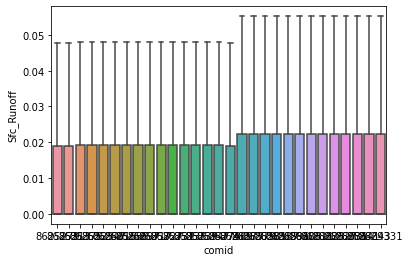

In [198]:
import seaborn as sns
sns.boxplot(data =df_focus_all, x='comid', y='Sfc_Runoff', showfliers=False)

<AxesSubplot:ylabel='Sfc_Runoff'>

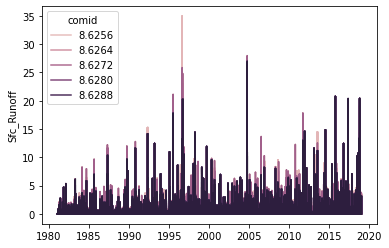

In [200]:
sns.lineplot(data =df_focus_all, x=df_focus_all.index, y='Sfc_Runoff', hue='comid') #Hue set for current data only displays 5 comids 

<AxesSubplot:ylabel='C'>

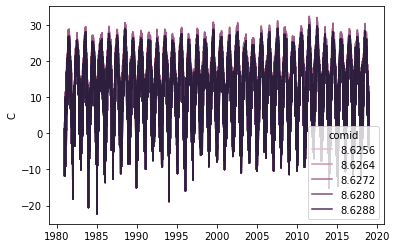

In [201]:
sns.lineplot(data =df_focus_all, x=df_focus_all.index, y='C', hue='comid')

<AxesSubplot:ylabel='Precip'>

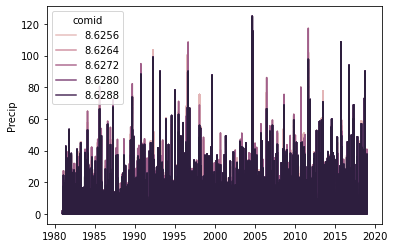

In [202]:
sns.lineplot(data =df_focus_all, x=df_focus_all.index, y='Precip', hue='comid')

In [195]:
#df_focus_all.to_csv('060623_BackCreek_All_NLDAS_1981_2018_SR_&_Climate.csv') #inlcudes COMID by ordered date if using in SQL query

In [174]:
import datetime as dt
import os


In [175]:
now = (dt.datetime.now().date())
now

datetime.date(2023, 6, 6)

In [176]:
filename = str(now) + '_COMID_' + str(comid_list[0][-1])
print(filename)

2023-06-06_COMID_8629331


In [177]:
for comid in comid_list[0]:
    df_focus_all.loc[df_focus_all['comid'] == comid].info() #partioned the cells which were focused on Haven't fully iterated yet
    file_comid = str(comid)
    #includes time span 
    filename2 = str(now) +'_' + output3['dataSource'] +'_SR_&_Climate_COMID_' + file_comid + '_'+ str(df_focus_all.index[0].year) + '_' + str(df_focus_all.index[-1].year) + '.csv'
    print(filename2)
    df_focus_all_2 = df_focus_all.loc[df_focus_all['comid'] == comid]#.drop(columns={'cell'})
    df_focus_all_2.info()
    #print(f"SW_Index_{cell}.csv")
    #file =  f"SW_Index_{cell}.csv"
    df_focus_all_2.drop(columns={'comid'}).to_csv(filename2, header=True, index=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  0 non-null      object 
 1   comid       0 non-null      int64  
 2   C           0 non-null      float64
 3   Precip      0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 0.0+ bytes
2023-06-06_nldas_SR_&_Climate_COMID_8625279_1981_2018.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  0 non-null      object 
 1   comid       0 non-null      int64  
 2   C           0 non-null      float64
 3   Precip      0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  0 non-null      object 
 1   comid       0 non-null      int64  
 2   C           0 non-null      float64
 3   Precip      0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 0.0+ bytes
2023-06-06_nldas_SR_&_Climate_COMID_8625775_1981_2018.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  0 non-null      object 
 1   comid       0 non-null      int64  
 2   C           0 non-null      float64
 3   Precip      0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13879 entries, 1981-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  13879 non-null  object 
 1   comid       13879 non-null  int64  
 2   C           13879 non-null  float64
 3   Precip      13879 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 542.1+ KB
2023-06-06_nldas_SR_&_Climate_COMID_8628631_1981_2018.csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13879 entries, 1981-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sfc_Runoff  13879 non-null  object 
 1   comid       13879 non-null  int64  
 2   C           13879 non-null  float64
 3   Precip      13879 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 542.1+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13879 entries, 1981

In [ ]:
#correct accessibility of location list and auotomation of exporting files inclusive of current date, source of data, units
#Index number and start and end year e.g. (filename2 = 2023-03-17_nldas_SR_mm_COMID_262790_1992_2019.csv)
for comid in comid_list:
    df_focus_all.loc[df_focus_all['comid'] == comid].info() #partioned the cells which were focused on 
    file_comid = str(comid)
    #includes time span 
    filename2 = str(now) +'_' + output3['source'] +'_SR_mm_COMID_' + file_comid + '_'+ str(df_focus_all.index[0].year) + '_' + str(df_foucs_all.index[-1].year) + '.csv'
    print(filename2)
    df_runoff_all_2 = df_focus_all.loc[df_focus_all['comid'] == comid]#.drop(columns={'cell'})
    df_runoff_all_2.info()
    #print(f"SW_Index_{cell}.csv")
    #file =  f"SW_Index_{cell}.csv"
    df_runoff_all_2.drop(columns={'cell'}).to_csv(filename2, header=False, index=False)